# Project 2: Ames Housing Data and Kaggle Challenge

## Problem Statement

- We are a team of real estate consultants providing advice to property developers and/or clients for asset appreciation.

- Aims: Identify features with a strong positive correlation to the sale price of a home and generate business insights to maximize the ROI.

- We will focus on some neighbourhood(s) as well as the features that can fetch the highest sale price.

- The three neighbourhood(s) that I am working on are: NAmes, College Creek and Old Town.

- The features that I am interested to look at are: Bedrooms, Full Bathrooms, Basement as well as Kitchen.

### Assumptions

The assumptions made for this modelling are:
- As developers, there is no fixed land space per house decided upon yet.
- Multicolinearity between features are assumed to be absent when predicting which features will drive sale price.
- Cost of building the features was not taken into account.

### Contents:
- [Import Libraries](#Import-Libraries)
- [Data Import](#Data-Import)
- [Data Dictionary](#Data-Dictionary)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis and Visualisation](#Exploratory-Data-Analysis-and-Visualisation)
- [Feature Engineering](#Feature-Engineering)
- [Modelling](#Modelling)
- [Business Analysis](#Business-Analysis)
- [Recommendations](#Recommendations)
- [Submission to Kaggle](#Submission-to-Kaggle)

### Background

Ames is the a city in the state of Iowa, USA. It is best known as the home of Iowa State University, with leading agriculture, design, engineering, and veterinary medicine colleges. It is the nineth largest city, with a population of about 67,000 people. The students of Iowa State University makes up about half of its population. This also means that property rental is a huge market in this city.

Iowa is located in the midwest region and suffers hot, humid summers and freezing winters. On the average, there are about 200 sunny days in Iowa.

Iowa State University is ranked #75 amongst public colleages, making it an attractive university to attend if you live in the region. ([*source*](https://www.forbes.com/colleges/iowa-state-university/?sh=5892079a14dc)) It is also home to a research laboratory for the U.S. Department of Energy and NASA’s Iowa Space Grant Consortium.

The Ames Housing data examines the houses sold between 2006 - 2010.

## Import Libraries

In [149]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

%matplotlib inline

## Data Import

### Files that are used for this project

Data used in this modelling are:
* [`train.csv`](./datasets/train.csv): contains all of the training data for the model
* [`cleaned train.csv`]('datasets/cleaned_train.csv'): contains all of the cleaned training data for the model 
* [`cleaned_train_feature.csv`](./datasets/cleaned_train_feature.csv): contains the cleaned training data with encoded features for the model
* [`test.csv`](./datasets/test.csv): contains the test data for the model that is used to feed into the regression model to make predictions.
* [`cleaned_test_feature.csv`](./datasets/cleaned_test_feature.csv): contains the cleaned test data for the model that is used to feed into the regression model to make predictions.
* [`submission.csv`](./datasets/submission.csv): submission to kaggle

### Data Import

In [150]:
# import train dataset
df = pd.read_csv('datasets/train.csv')
#to view all at least 500 columns of the data
pd.options.display.max_columns = 500
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Data Dictionary

### Data Dictionary of the features that are used for modelling in this project

|Feature			|Data Type	|Variable			|Description					|
|-------			|----		|-------			|-----------					|
|Overall Qual		|int64		|Ordinal			|Rates the overall material and finish of the house|
|Gr Liv Area		|int64		|Continuous			|Above grade (ground) living area square feet|
|Total Bsmt SF		|float64	|Continuous			|Total square feet of basement area|
|1st Flr SF			|int64		|Continuous			|First Floor square feet|
|Garage Area		|float64	|Continuous			|Size of garage in square feet|
|House Age			|int64		|Discrete			|Year Built – Year Sold|
|Full Bath			|int64		|Discrete			|Full bathrooms above grade|
|Mass Vnr Area		|float64	|Continuous			|Masonry veneer area in square feet|
|Fireplaces			|int64		|Discrete			|Number of fireplaces|
|Sale Price			|int64		|Continuous			|Price of sale|

### Data Summary

In [151]:
df.shape

(2051, 81)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [153]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


#### Based on data summary, the following will be done:
- cleaning the null values (decide which to drop or impute)
- check for missing data
- investigate the Garage Yr Blt (stated as 2207)
- to convert ordinal and nominal data through 'label encoding' and 'get dummies' after EDA

## Data Cleaning

### Check for missing data / null values

In [154]:
# show full list of null values in data
null_values = df.isnull().sum().sort_values(ascending=False)
print(null_values[null_values > 0])

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
dtype: int64


In [155]:
# check percentage of missing data 
percent_null_data = null_values * 100 / len(df)
print(percent_null_data[percent_null_data > 0])

Pool QC           99.561190
Misc Feature      96.830814
Alley             93.174061
Fence             80.497318
Fireplace Qu      48.756704
Lot Frontage      16.089712
Garage Finish      5.558264
Garage Qual        5.558264
Garage Yr Blt      5.558264
Garage Cond        5.558264
Garage Type        5.509508
Bsmt Exposure      2.827889
BsmtFin Type 2     2.730375
BsmtFin Type 1     2.681619
Bsmt Cond          2.681619
Bsmt Qual          2.681619
Mas Vnr Area       1.072647
Mas Vnr Type       1.072647
Bsmt Half Bath     0.097513
Bsmt Full Bath     0.097513
Garage Area        0.048757
Total Bsmt SF      0.048757
Bsmt Unf SF        0.048757
BsmtFin SF 2       0.048757
BsmtFin SF 1       0.048757
Garage Cars        0.048757
dtype: float64


#### Pool QC, Misc Feature, Alley and Fence has majority of the data missing. Hence, will drop these columns

In [156]:
# drop Pool QC, Misc Feature, Alley and Fence due to majority of data missing
df.drop(['Pool QC'], axis = 1, inplace = True)
df.drop(['Misc Feature'], axis = 1, inplace = True)
df.drop(['Alley'], axis = 1, inplace = True)
df.drop(['Fence'], axis = 1, inplace = True)

#drop PID columns because they are not required
df.drop(['PID'], axis = 1, inplace = True)

#drop Month Sold because it is not important to my analysis or modelling
df.drop(['Mo Sold'], axis = 1, inplace = True)

df.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,Sale Type,SalePrice
0,109,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,2010,WD,130500
1,544,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,2009,WD,220000
2,153,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,2010,WD,109000
3,318,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,2010,WD,174000
4,255,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,2010,WD,138500


In [157]:
#check if column is dropped correctly (total 6 columns dropped)
df.shape

(2051, 75)

#### Bsmt Half Bath, Bsmt Full Bath, BsmtFin SF 1, Garage Area, Garage Cars, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Mas Vnr Area, Mas Vnr Type has null values that amount to less than or about 1% of the full data. Hence, propose to drop the rows.

In [158]:
#drop rows with null values from the following columns
df.dropna(subset=['Bsmt Half Bath'], inplace=True)
df.dropna(subset=['Bsmt Full Bath'], inplace=True)
df.dropna(subset=['BsmtFin SF 1'], inplace=True)
df.dropna(subset=['Garage Area'], inplace=True)
df.dropna(subset=['Garage Cars'], inplace=True)
df.dropna(subset=['BsmtFin SF 2'], inplace=True)
df.dropna(subset=['Bsmt Unf SF'], inplace=True)
df.dropna(subset=['Total Bsmt SF'], inplace=True)
df.dropna(subset=['Mas Vnr Area'], inplace=True)
df.dropna(subset=['Mas Vnr Type'], inplace=True)

In [159]:
#check if rows are dropped correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2050
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2026 non-null   int64  
 1   MS SubClass      2026 non-null   int64  
 2   MS Zoning        2026 non-null   object 
 3   Lot Frontage     1702 non-null   float64
 4   Lot Area         2026 non-null   int64  
 5   Street           2026 non-null   object 
 6   Lot Shape        2026 non-null   object 
 7   Land Contour     2026 non-null   object 
 8   Utilities        2026 non-null   object 
 9   Lot Config       2026 non-null   object 
 10  Land Slope       2026 non-null   object 
 11  Neighborhood     2026 non-null   object 
 12  Condition 1      2026 non-null   object 
 13  Condition 2      2026 non-null   object 
 14  Bldg Type        2026 non-null   object 
 15  House Style      2026 non-null   object 
 16  Overall Qual     2026 non-null   int64  
 17  Overall Cond  

In [160]:
# show full list of null values in data
null_values = df.isnull().sum().sort_values(ascending=False)
print(null_values[null_values > 0])

Fireplace Qu      990
Lot Frontage      324
Garage Type       112
Garage Yr Blt     112
Garage Finish     112
Garage Qual       112
Garage Cond       112
Bsmt Exposure      56
BsmtFin Type 2     54
Bsmt Qual          53
Bsmt Cond          53
BsmtFin Type 1     53
dtype: int64


In [161]:
# check percentage of missing data 
percent_null_data = null_values * 100 / len(df)
print(percent_null_data[percent_null_data > 0])

Fireplace Qu      48.864758
Lot Frontage      15.992103
Garage Type        5.528134
Garage Yr Blt      5.528134
Garage Finish      5.528134
Garage Qual        5.528134
Garage Cond        5.528134
Bsmt Exposure      2.764067
BsmtFin Type 2     2.665350
Bsmt Qual          2.615992
Bsmt Cond          2.615992
BsmtFin Type 1     2.615992
dtype: float64


#### Investigate why Fireplace Qu has null values

In [162]:
#count number of 0, 1, 2, 4 to see if can find where the missing values belong
df['Fireplaces'].value_counts()

0    990
1    886
2    143
3      6
4      1
Name: Fireplaces, dtype: int64

In [163]:
#count number of fireplace quality see if can find where the missing values belong
df['Fireplace Qu'].value_counts()

Gd    513
TA    402
Fa     59
Ex     31
Po     31
Name: Fireplace Qu, dtype: int64

#### Based on the value counts above, it seems that there are 990 houses with no fireplace, which corresponds with the null values of Fireplace Qu. Hence, will replace Fireplace Qu null values with 'No'

In [164]:
df['Fireplace Qu'].fillna('No', inplace = True) 
df['Fireplace Qu'].value_counts()

No    990
Gd    513
TA    402
Fa     59
Ex     31
Po     31
Name: Fireplace Qu, dtype: int64

In [165]:
# show full list of null values in data
null_values = df.isnull().sum().sort_values(ascending=False)
print(null_values[null_values > 0])

Lot Frontage      324
Garage Type       112
Garage Yr Blt     112
Garage Finish     112
Garage Cond       112
Garage Qual       112
Bsmt Exposure      56
BsmtFin Type 2     54
Bsmt Cond          53
BsmtFin Type 1     53
Bsmt Qual          53
dtype: int64


In [166]:
# check percentage of missing data 
percent_null_data = null_values * 100 / len(df)
print(percent_null_data[percent_null_data > 0])

Lot Frontage      15.992103
Garage Type        5.528134
Garage Yr Blt      5.528134
Garage Finish      5.528134
Garage Cond        5.528134
Garage Qual        5.528134
Bsmt Exposure      2.764067
BsmtFin Type 2     2.665350
Bsmt Cond          2.615992
BsmtFin Type 1     2.615992
Bsmt Qual          2.615992
dtype: float64


#### Investigate Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Cond, Bsmt Qual data

In [167]:
df['Bsmt Exposure'].value_counts()

No    1321
Av     284
Gd     202
Mn     163
Name: Bsmt Exposure, dtype: int64

In [168]:
df['BsmtFin Type 2'].value_counts()

Unf    1727
Rec      80
LwQ      60
BLQ      48
ALQ      34
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [169]:
df['BsmtFin Type 1'].value_counts()

GLQ    604
Unf    593
ALQ    292
BLQ    200
Rec    182
LwQ    102
Name: BsmtFin Type 1, dtype: int64

In [170]:
df['Bsmt Cond'].value_counts()

TA    1813
Gd      87
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [171]:
df['Bsmt Qual'].value_counts()

TA    886
Gd    849
Ex    177
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

#### Will replace null values for Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Cond, Bsmt Qual with mode values

In [172]:
df['Bsmt Exposure'].fillna(df['Bsmt Exposure'].mode()[0], inplace=True)
df['BsmtFin Type 2'].fillna(df['BsmtFin Type 2'].mode()[0], inplace=True)
df['BsmtFin Type 1'].fillna(df['BsmtFin Type 1'].mode()[0], inplace=True)
df['Bsmt Cond'].fillna(df['Bsmt Cond'].mode()[0], inplace=True)
df['Bsmt Qual'].fillna(df['Bsmt Qual'].mode()[0], inplace=True)

In [173]:
# show full list of null values in data
null_values = df.isnull().sum().sort_values(ascending=False)
print(null_values[null_values > 0])

Lot Frontage     324
Garage Type      112
Garage Yr Blt    112
Garage Finish    112
Garage Qual      112
Garage Cond      112
dtype: int64


In [174]:
# check percentage of missing data 
percent_null_data = null_values * 100 / len(df)
print(percent_null_data[percent_null_data > 0])

Lot Frontage     15.992103
Garage Type       5.528134
Garage Yr Blt     5.528134
Garage Finish     5.528134
Garage Qual       5.528134
Garage Cond       5.528134
dtype: float64


#### Check if Garage Yr Blt states max year 2207 is an error

In [175]:
#seems like the row with Garage Yr Blt has been removed
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2026.0,1472.936328,845.609327,1.0,751.25,1480.5,2196.50,2930.0
MS SubClass,2026.0,57.134748,42.943214,20.0,20.00,50.0,70.00,190.0
Lot Frontage,1702.0,68.960047,23.218783,21.0,58.00,68.0,80.00,313.0
Lot Area,2026.0,10038.427937,6707.696525,1300.0,7500.00,9402.5,11498.00,159000.0
Overall Qual,2026.0,6.101185,1.425042,1.0,5.00,6.0,7.00,10.0
Overall Cond,2026.0,5.567127,1.107410,1.0,5.00,5.0,6.00,9.0
Year Built,2026.0,1971.415597,30.145229,1872.0,1953.00,1974.0,2000.00,2010.0
Year Remod/Add,2026.0,1983.980750,21.036010,1950.0,1964.00,1993.0,2004.00,2010.0
Mas Vnr Area,2026.0,99.843534,175.050567,0.0,0.00,0.0,161.75,1600.0
BsmtFin SF 1,2026.0,442.010365,460.792112,0.0,0.00,368.0,733.00,5644.0


#### Investigate data of Garage Yr Blt, Garage Cond, Garage Finish, Garage Qual, Garage Type

In [176]:
df[df[['Garage Yr Blt','Garage Qual', 'Garage Cond', 'Garage Finish', 'Garage Area', 'Garage Type']].isnull().any(axis=1)][['Garage Yr Blt','Garage Qual', 'Garage Cond', 'Garage Finish', 'Garage Area', 'Garage Type']]

,Garage Yr Blt,Garage Qual,Garage Cond,Garage Finish,Garage Area,Garage Type
28,NaN,NaN,NaN,NaN,0.0,NaN
53,NaN,NaN,NaN,NaN,0.0,NaN
65,NaN,NaN,NaN,NaN,0.0,NaN
79,NaN,NaN,NaN,NaN,0.0,NaN
101,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...
1991,NaN,NaN,NaN,NaN,0.0,NaN
2010,NaN,NaN,NaN,NaN,0.0,NaN
2027,NaN,NaN,NaN,NaN,0.0,NaN
2039,NaN,NaN,NaN,NaN,0.0,NaN


#### Based on the above, seems like the null values of the garage year built is related to the other garage null values. Hence, will assume that these rows have no garage and replace data with according

In [177]:
df['Garage Yr Blt'].fillna('0', inplace = True)
df['Garage Qual'].fillna('No', inplace = True)
df['Garage Cond'].fillna('No', inplace = True)
df['Garage Finish'].fillna('No', inplace = True)
df['Garage Area'].fillna('0', inplace = True)
df['Garage Type'].fillna('No', inplace = True)

#### Create new column to show age of house when house was sold

In [178]:
df["House Age"] = df["Yr Sold"] - df["Year Built"]

In [179]:
df.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,Sale Type,SalePrice,House Age
0,109,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,No,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,2010,WD,130500,34
1,544,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,2009,WD,220000,13
2,153,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,No,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,2010,WD,109000,57
3,318,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,No,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,2010,WD,174000,4
4,255,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,No,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,2010,WD,138500,110


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2050
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2026 non-null   int64  
 1   MS SubClass      2026 non-null   int64  
 2   MS Zoning        2026 non-null   object 
 3   Lot Frontage     1702 non-null   float64
 4   Lot Area         2026 non-null   int64  
 5   Street           2026 non-null   object 
 6   Lot Shape        2026 non-null   object 
 7   Land Contour     2026 non-null   object 
 8   Utilities        2026 non-null   object 
 9   Lot Config       2026 non-null   object 
 10  Land Slope       2026 non-null   object 
 11  Neighborhood     2026 non-null   object 
 12  Condition 1      2026 non-null   object 
 13  Condition 2      2026 non-null   object 
 14  Bldg Type        2026 non-null   object 
 15  House Style      2026 non-null   object 
 16  Overall Qual     2026 non-null   int64  
 17  Overall Cond  

#### About 16% of Lot Frontage data is missing. I decided to investigate its relationship with Lot Area

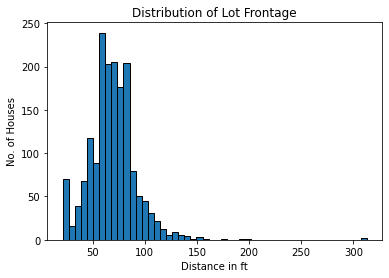

In [181]:
#looking at the distribution of Lot Frontage
plt.hist(df['Lot Frontage'], edgecolor = 'black', bins = 50);
plt.title('Distribution of Lot Frontage')
plt.xlabel('Distance in ft')
plt.ylabel('No. of Houses');

In [182]:
#correlation
df[['Lot Frontage', 'Lot Area']].corr()

,Lot Frontage,Lot Area
Lot Frontage,1.000000,0.576321
Lot Area,0.576321,1.000000


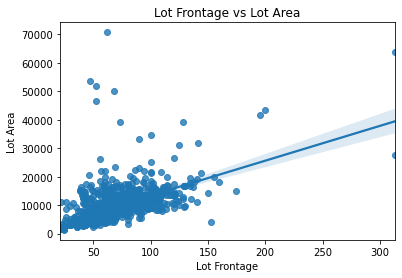

In [183]:
ax = sns.regplot(x = df['Lot Frontage'], y = df['Lot Area'])
ax.set(xlabel='Lot Frontage', ylabel='Lot Area')
ax.set_title('Lot Frontage vs Lot Area', fontsize = 12)
plt.show();

In [184]:
#Linear Regression
df2 = df[['Lot Frontage', 'Lot Area']]
df2.dropna(inplace=True)
X = df2[['Lot Area']]
y = df2['Lot Frontage']
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [185]:
#get the y intercept and coef
intercept = lr.intercept_
coef = lr.coef_
print(intercept)
print(coef)

42.90559492163656
[0.00271468]


In [186]:
#plot the coef and y intercept into the Lot Frontage
df['Lot Frontage'] = df.apply(lambda x: int(x['Lot Area']*coef + intercept) if np.isnan(x['Lot Frontage']) else x['Lot Frontage'],axis =1)

In [187]:
df['Lot Frontage'].value_counts()

60.0     181
70.0     105
80.0      97
50.0      93
75.0      78
        ... 
198.0      1
25.0       1
355.0      1
171.0      1
195.0      1
Name: Lot Frontage, Length: 125, dtype: int64

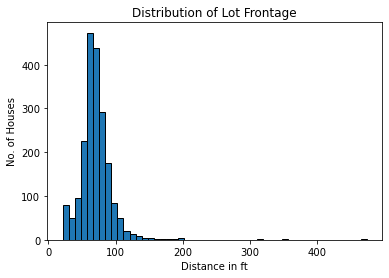

In [188]:
plt.hist(df['Lot Frontage'], edgecolor = 'black', bins = 50);
plt.title('Distribution of Lot Frontage')
plt.xlabel('Distance in ft')
plt.ylabel('No. of Houses');

In [189]:
# show full list of null values in data
null_values = df.isnull().sum().sort_values(ascending=False)
print(null_values[null_values > 0])

Series([], dtype: int64)


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2050
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2026 non-null   int64  
 1   MS SubClass      2026 non-null   int64  
 2   MS Zoning        2026 non-null   object 
 3   Lot Frontage     2026 non-null   float64
 4   Lot Area         2026 non-null   int64  
 5   Street           2026 non-null   object 
 6   Lot Shape        2026 non-null   object 
 7   Land Contour     2026 non-null   object 
 8   Utilities        2026 non-null   object 
 9   Lot Config       2026 non-null   object 
 10  Land Slope       2026 non-null   object 
 11  Neighborhood     2026 non-null   object 
 12  Condition 1      2026 non-null   object 
 13  Condition 2      2026 non-null   object 
 14  Bldg Type        2026 non-null   object 
 15  House Style      2026 non-null   object 
 16  Overall Qual     2026 non-null   int64  
 17  Overall Cond  

## Exploratory Data Analysis and Visualisation

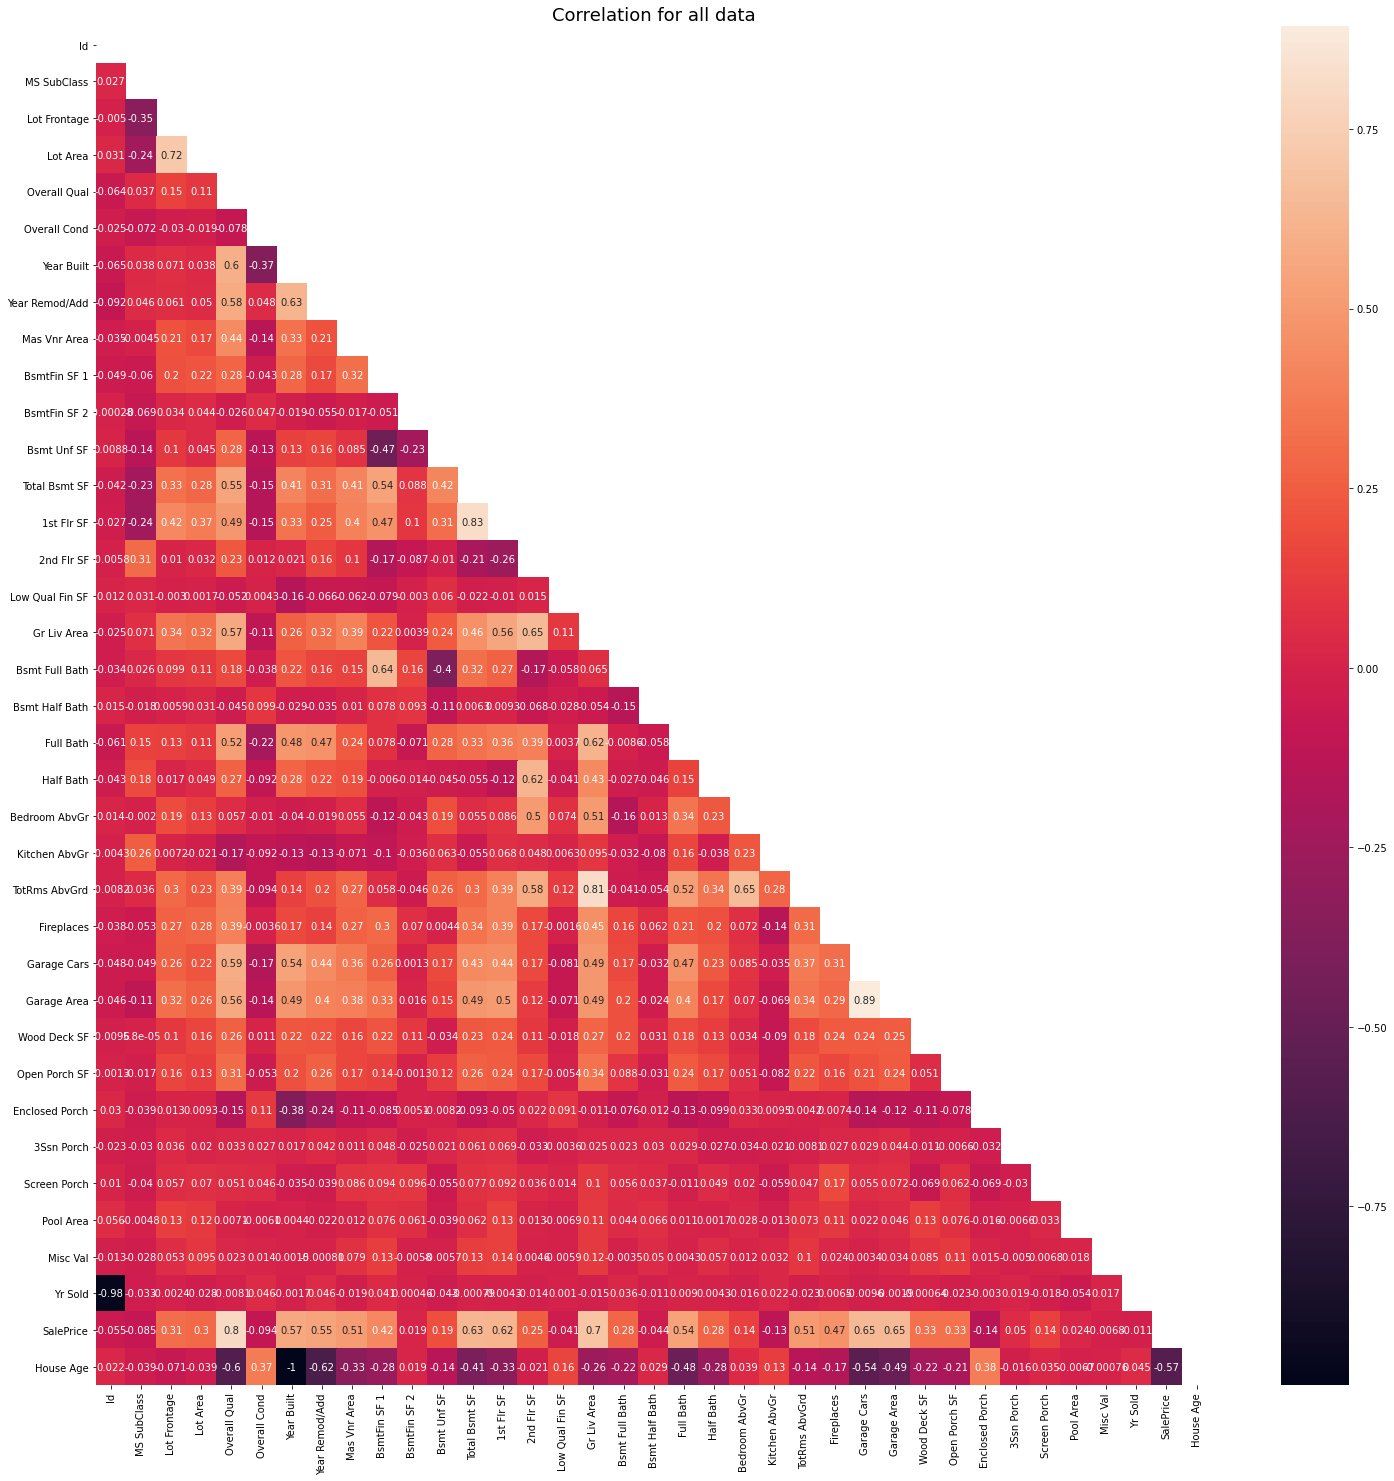

In [191]:
#corelation of all data
plt.figure(figsize = (25,25))
corr= df.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix)
plt.title("Correlation for all data", fontsize = 18);

In [192]:
#creating numeric features df
num_features = df.select_dtypes(include=[np.number])
print(num_features.dtypes)

Id                   int64
MS SubClass          int64
Lot Frontage       float64
Lot Area             int64
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Mas Vnr Area       float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
TotRms AbvGrd        int64
Fireplaces           int64
Garage Cars        float64
Garage Area        float64
Wood Deck SF         int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Misc Val             int64
Yr Sold              int64
SalePrice            int64
House Age            int64
d

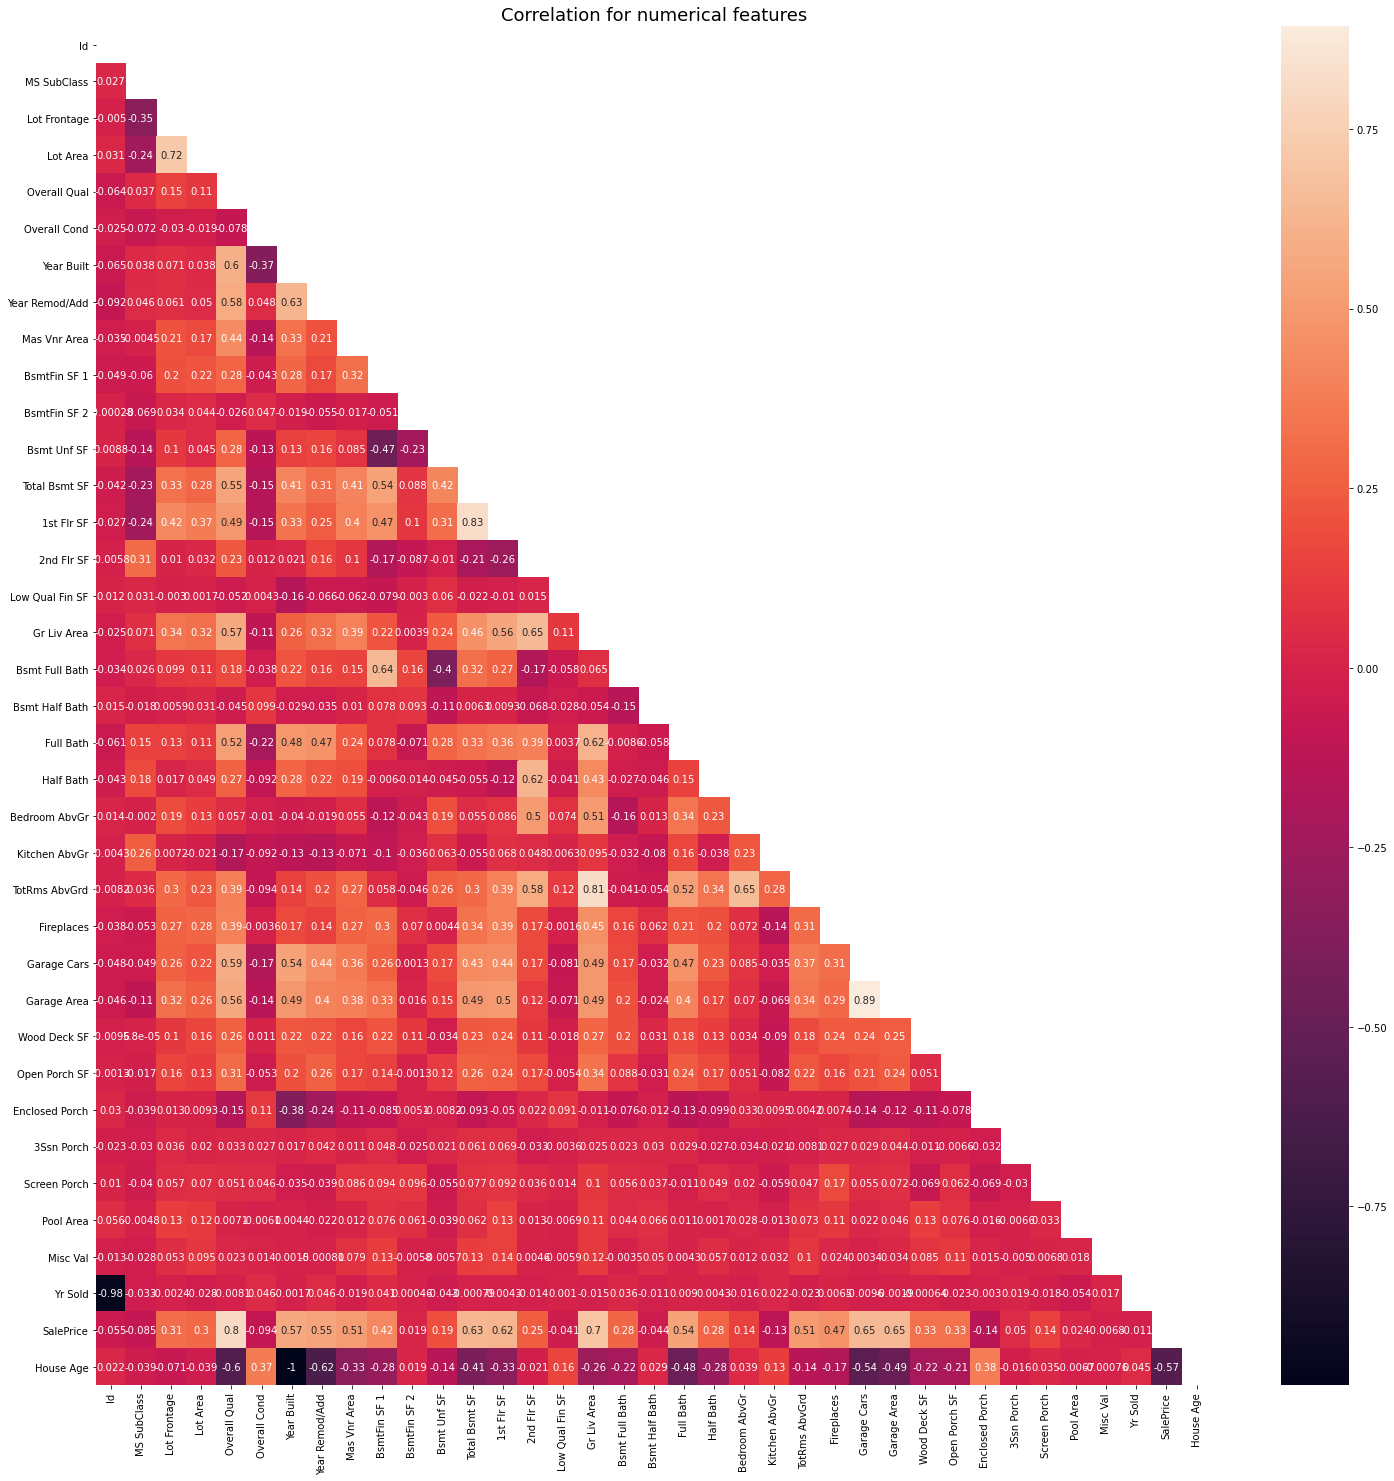

In [193]:
#corelation of numerical features
plt.figure(figsize = (25,25))
corr= num_features.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix)
plt.title("Correlation for numerical features", fontsize = 18);

In [194]:
#Top 5 numerical features correlation
ls = list(df.corrwith(num_features['SalePrice']))
ls.sort(reverse=True)
ls[0:9]

num_features[num_features.columns[1:]].corr()['SalePrice'].sort_values(ascending=False)[:10]

SalePrice         1.000000
Overall Qual      0.799978
Gr Liv Area       0.699026
Garage Area       0.648661
Garage Cars       0.647015
Total Bsmt SF     0.631975
1st Flr SF        0.623523
Year Built        0.571860
Year Remod/Add    0.549397
Full Bath         0.538471
Name: SalePrice, dtype: float64

#### The Top 5 features are: Overall Qual, Gr Liv Area, Garage Area, Garage Cars, Total Bsmt SF. However, to prevent the possibility of multicollinearity, will remove Garage Cars and replace with 1st Flr SF.

In [195]:
#finding the correlation and p value between the price and the top 5 features
corr1, p_value1 = pearsonr(num_features['Overall Qual'], num_features['SalePrice'])
corr2, p_value2 = pearsonr(num_features['Gr Liv Area'], num_features['SalePrice'])
corr3, p_value3 = pearsonr(num_features['Garage Area'], num_features['SalePrice'])
corr4, p_value4 = pearsonr(num_features['Total Bsmt SF'], num_features['SalePrice'])
corr5, p_value5 = pearsonr(num_features['1st Flr SF'], num_features['SalePrice'])

print(f'The correlation between Overall Qual and SalePrice is {corr1}, and the p value is {p_value1}')
print(f'The correlation between Gr Liv Area and SalePrice is {corr2}, and the p value is {p_value2}')
print(f'The correlation between Garage Area and SalePrice is {corr3}, and the p value is {p_value3}')
print(f'The correlation between Total Bsmt SF and SalePrice is {corr4}, and the p value is {p_value4}')
print(f'The correlation between 1st Flr SF and SalePrice is {corr5}, and the p value is {p_value5}')

The correlation between Overall Qual and SalePrice is 0.7999776468552775, and the p value is 0.0
The correlation between Gr Liv Area and SalePrice is 0.6990261976962194, and the p value is 4.3408944206631346e-297
The correlation between Garage Area and SalePrice is 0.6486608314130746, and the p value is 2.8096548744001045e-242
The correlation between Total Bsmt SF and SalePrice is 0.6319751450817849, and the p value is 2.40734334732171e-226
The correlation between 1st Flr SF and SalePrice is 0.6235229260465519, and the p value is 1.2159510408953166e-218


#### The above features have a confidence level of 95% that they are positively corelated with the sale price

In [196]:
#lowest 5 numerical features correlation
ls = list(df.corrwith(num_features['SalePrice']))
ls.sort(reverse=True)
ls[0:9]

num_features[num_features.columns[1:]].corr()['SalePrice'].sort_values(ascending=True)[:10]

House Age         -0.571755
Enclosed Porch    -0.138048
Kitchen AbvGr     -0.126232
Overall Cond      -0.094233
MS SubClass       -0.085339
Bsmt Half Bath    -0.043856
Low Qual Fin SF   -0.041153
Yr Sold           -0.011046
Misc Val          -0.006787
BsmtFin SF 2       0.019387
Name: SalePrice, dtype: float64

#### The Bottom 5 features seems to be weakly corelated with SalePrice except for the age of the house.

In [197]:
#finding the correlation and p value between the price and the bottom 5 features
corr6, p_value6 = pearsonr(num_features['House Age'], num_features['SalePrice'])
corr7, p_value7 = pearsonr(num_features['Enclosed Porch'], num_features['SalePrice'])
corr8, p_value8 = pearsonr(num_features['Kitchen AbvGr'], num_features['SalePrice'])
corr9, p_value9 = pearsonr(num_features['Overall Cond'], num_features['SalePrice'])
corr10, p_value10 = pearsonr(num_features['Bsmt Half Bath'], num_features['SalePrice'])

print(f'The correlation between House Age and SalePrice is {corr6}, and the p value is {p_value6}')
print(f'The correlation between Enclosed Porch and SalePrice is {corr7}, and the p value is {p_value7}')
print(f'The correlation between Kitchen AbvGr and SalePrice is {corr8}, and the p value is {p_value8}')
print(f'The correlation between Overall Cond and SalePrice is {corr9}, and the p value is {p_value9}')
print(f'The correlation between Bsmt Half Bath and SalePrice is {corr10}, and the p value is {p_value10}')

The correlation between House Age and SalePrice is -0.571755075715241, and the p value is 3.200013318501851e-176
The correlation between Enclosed Porch and SalePrice is -0.1380481588925395, and the p value is 4.382359190050577e-10
The correlation between Kitchen AbvGr and SalePrice is -0.12623229600823432, and the p value is 1.1898929744094138e-08
The correlation between Overall Cond and SalePrice is -0.09423265619286526, and the p value is 2.153461328870082e-05
The correlation between Bsmt Half Bath and SalePrice is -0.04385628524598757, and the p value is 0.0484100140362336


#### The above features have a confidence level of 95% that they are negatively corelated with the sale price

#### Taking a look at how different features affect sale price

In [198]:
variables = {
    'has 2nd floor' : '2nd Flr SF',
    'has basement' : 'Total Bsmt SF',
    'has fireplace' : 'Fireplaces',
    'has garage' : 'Garage Area',
    'has pool' : 'Pool Area'
}

for factor_column, column in variables.items():
    df[factor_column] = df[column].apply(lambda x:1 if x > 0 else 0)
variables = list(variables.keys())

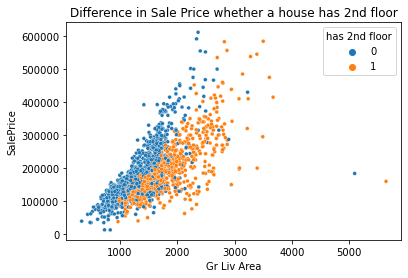

In [199]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', hue = 'has 2nd floor', s = 15, data = df)
plt.title("Difference in Sale Price whether a house has 2nd floor", fontsize = 12);

#### For some reason, the prices of houses without 2nd floor is more expensive than those with 2nd floor. This will make sense if given a fixed area (x-axis), people prefer no 2nd floor but a larger 1st floor.

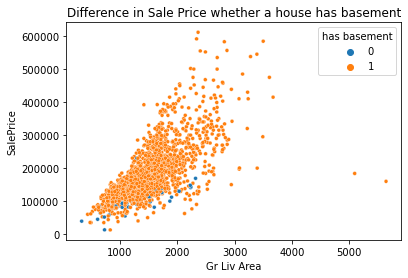

In [200]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', hue = 'has basement', s = 15, data = df)
plt.title("Difference in Sale Price whether a house has basement", fontsize = 12);

#### Most of the houses have a basement. Therefore, not an important predictor of prices. Even though houses without basement seem to be sold at a lower price there is not really a premium to have a basement.

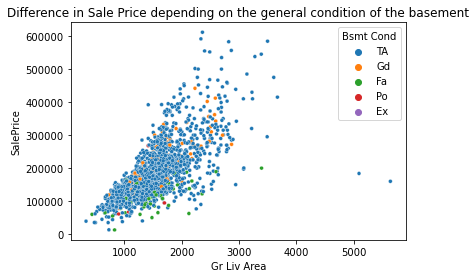

In [201]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', hue = 'Bsmt Cond', s = 15, data = df)
plt.title("Difference in Sale Price depending on the general condition of the basement", fontsize = 12);

#### Most of the basement general condition is typical.

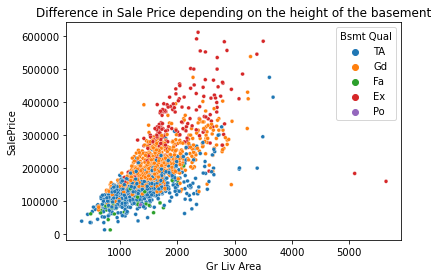

In [202]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', hue = 'Bsmt Qual', s = 15, data = df)
plt.title("Difference in Sale Price depending on the height of the basement", fontsize = 12);

#### The height of the basement plays an important factor to the sale price. 

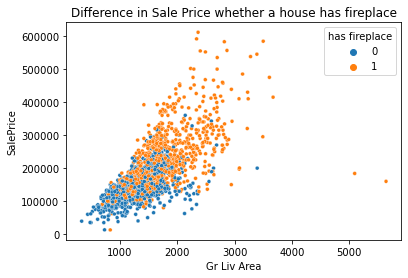

In [203]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', hue = 'has fireplace', s = 15, data = df)
plt.title("Difference in Sale Price whether a house has fireplace", fontsize = 12);

#### Bigger houses are more likely to have a fireplace. Houses with fireplace, which are also usually bigger, costs more than those without fireplaces

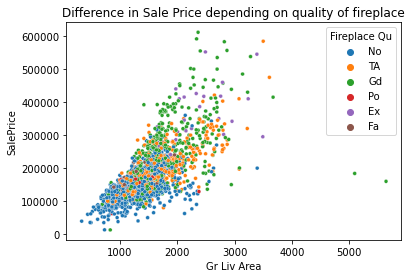

In [204]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', hue = 'Fireplace Qu', s = 15, data = df)
plt.title("Difference in Sale Price depending on quality of fireplace", fontsize = 12);

#### The quality of the fireplace does not seem to affect the sale price as much as whether the house has a fireplace.

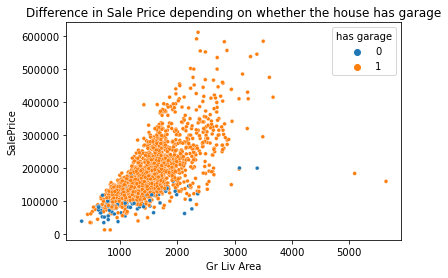

In [205]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', hue = 'has garage', s = 15, data = df)
plt.title("Difference in Sale Price depending on whether the house has garage", fontsize = 12);

#### Most of the houses have garages and houses without garage is sold at a lower price.

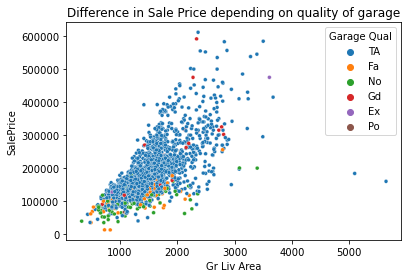

In [206]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', hue = 'Garage Qual', s = 15, data = df)
plt.title("Difference in Sale Price depending on quality of garage", fontsize = 12);

#### Most of the garages are typical

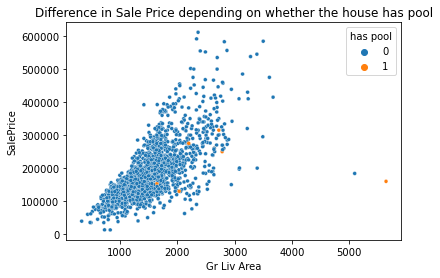

In [207]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', hue = 'has pool', s = 15, data = df)
plt.title("Difference in Sale Price depending on whether the house has pool", fontsize = 12);

#### Most of the houses does not have a pool

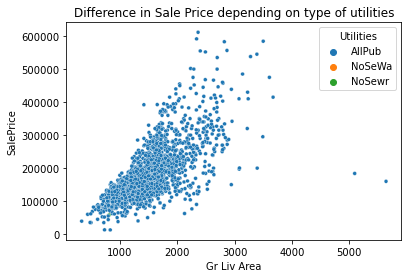

In [208]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', hue = 'Utilities', s = 15, data = df)
plt.title("Difference in Sale Price depending on type of utilities", fontsize = 12);

#### Most of the houses have all public utitlities.

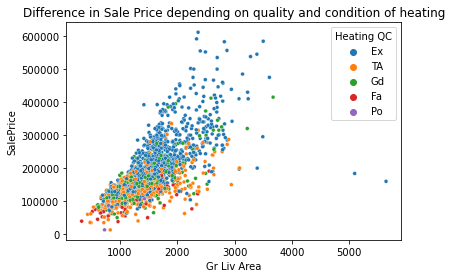

In [209]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', hue = 'Heating QC', s = 15, data = df)
plt.title("Difference in Sale Price depending on quality and condition of heating", fontsize = 12);

#### The quality affects the sale price. The better it is, the higher the sale price.

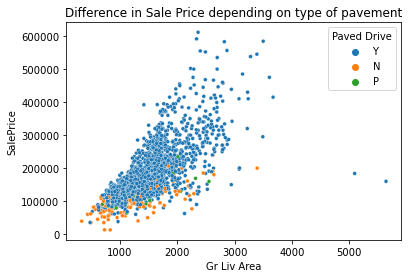

In [210]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', hue = 'Paved Drive', s = 15, data = df)
plt.title("Difference in Sale Price depending on type of pavement", fontsize = 12);

#### Most of the houses have a paved driveway

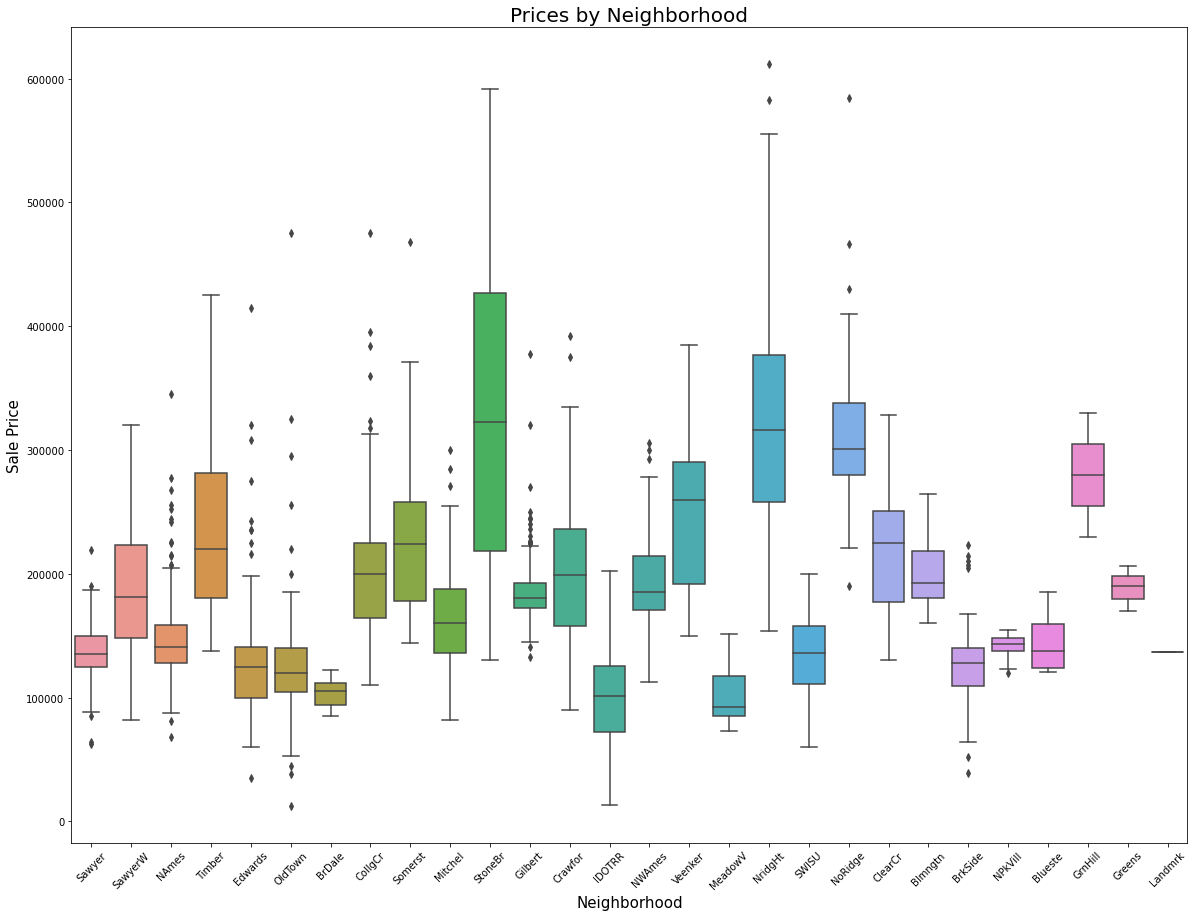

In [211]:
#boxplot of the prices by neighborhoods
_,ax = plt.subplots(figsize = (20,15))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = df, ax = ax)
ax.set_title('Prices by Neighborhood', fontsize = 20)
ax.set_xlabel('Neighborhood', fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_ylabel('Sale Price', fontsize = 15);

In [212]:
#save to csv
df.to_csv('datasets/cleaned_train.csv', index = False)

## Feature Engineering

In [213]:
#print features that are object data types
object_features = df.select_dtypes(include=[np.object])
print(object_features.dtypes)

MS Zoning         object
Street            object
Lot Shape         object
Land Contour      object
Utilities         object
Lot Config        object
Land Slope        object
Neighborhood      object
Condition 1       object
Condition 2       object
Bldg Type         object
House Style       object
Roof Style        object
Roof Matl         object
Exterior 1st      object
Exterior 2nd      object
Mas Vnr Type      object
Exter Qual        object
Exter Cond        object
Foundation        object
Bsmt Qual         object
Bsmt Cond         object
Bsmt Exposure     object
BsmtFin Type 1    object
BsmtFin Type 2    object
Heating           object
Heating QC        object
Central Air       object
Electrical        object
Kitchen Qual      object
Functional        object
Fireplace Qu      object
Garage Type       object
Garage Yr Blt     object
Garage Finish     object
Garage Qual       object
Garage Cond       object
Paved Drive       object
Sale Type         object
dtype: object


### Encoding Ordinal Features

#### Changing Ordinal Features to 0, 1, 2, 3, etc.

In [214]:
df['Lot Shape'] = df['Lot Shape'].replace({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3})
df['Utilities'] = df['Utilities'].replace({'AllPub':0, 'NoSewr':1, 'NoSeWa':2, 'ELO':3})
df['Land Slope'] = df['Land Slope'].replace({'Gtl':0, 'Mod':1, 'Sev':2})
df['Bsmt Qual'] = df['Bsmt Qual'].replace({'Gd':0, 'TA':1, 'Ex':2, 'No':3,'None':3, 'NA':3, 'Fa':4, 'Po' : 5})
df['Bsmt Cond'] = df['Bsmt Cond'].replace({'TA':0, 'Gd':1, 'No':2, 'None':2, 'NA':2, 'Fa':3,'Po':4, 'Ex' : 5})
df['Exter Qual'] = df['Exter Qual'].replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3, 'Po':4})
df['Exter Cond'] = df['Exter Cond'].replace({'TA':0, 'Gd':1, 'Fa':2, 'Po':3,'Ex':4})
df['Bsmt Exposure'] = df['Bsmt Exposure'].replace({'No':0, 'Gd':1, 'Mn':2, 'Av':3,'No':4,'None':4, 'NA':4})
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].replace({'GLQ':0, 'ALQ':1, 'Unf':2, 'Rec':3, 'BLQ':4, 'No':5, 'None':5, 'NA':5,'LwQ':6})
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].replace({'Unf':0, 'BLQ':1, 'No':2, 'None':2, 'NA':2,'ALQ':3, 'Rec':4, 'LwQ':5, 'GLQ':6})
df['Heating QC'] = df['Heating QC'].replace({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4})
df['Electrical'] = df['Electrical'].replace({'SBrkr':0, 'FuseF':1, 'FuseA':2, 'FuseP':3, 'Mix':4})
df['Kitchen Qual'] = df['Kitchen Qual'].replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3, 'Po':4})
df['Functional'] = df['Functional'].replace({'Typ':0, 'Min1':1, 'Maj1':2, 'Min2':3, 'Mod':4, 'Maj2':5, 'Sev':6, 'Sal':7})
df['Fireplace Qu'] = df['Fireplace Qu'].replace({'No':0,'None':0, 'NA':0, 'TA':1, 'Gd':2, 'Fa':3, 'Ex':4, 'Po':5})
df['Garage Finish'] = df['Garage Finish'].replace({'RFn':0, 'Unf':1, 'Fin':2, 'None':3, 'NA':3, 'No':3})
df['Garage Qual'] = df['Garage Qual'].replace({'TA':0, 'Fa':1, 'Gd':2, 'No':3, 'Ex':4, 'Po':5})
df['Garage Cond'] = df['Garage Cond'].replace({'TA':0, 'Fa':1, 'No':2,'None':2, 'NA':2, 'Gd':3, 'Po':4, 'Ex':5})
df['Paved Drive'] = df['Paved Drive'].replace({'Y':0, 'N':1, 'P':2})

In [215]:
#checking if it is successful randomly especially those with 'None' values
df['Fireplace Qu'].value_counts()

0    990
2    513
1    402
3     59
4     31
5     31
Name: Fireplace Qu, dtype: int64

In [216]:
#checking if it is successful randomly especially those with 'None' values
df['BsmtFin Type 1'].value_counts()

0    657
2    593
1    292
4    200
3    182
6    102
Name: BsmtFin Type 1, dtype: int64

In [217]:
#checking if it is successful randomly especially those with 'None' values
df['Garage Cond'].value_counts()

0    1845
2     112
1      47
3      12
4       8
5       2
Name: Garage Cond, dtype: int64

### Get Dummies

#### Use get_dummies to create dummy variables for categorical and discrete features

In [218]:
df = pd.get_dummies(df, columns=["MS Zoning", "Lot Shape", "Utilities", "Land Slope", "Overall Qual", "Overall Cond", "Exter Qual", "Exter Cond", "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2", "Heating QC", "Electrical", "Full Bath", "Half Bath", "Bedroom AbvGr", "Kitchen AbvGr", "Kitchen Qual", "Functional", "Fireplaces", "Fireplace Qu", "Garage Finish", "Garage Qual", "Garage Cond", "Paved Drive", "Street" ,"Land Contour" ,"Lot Config", "Neighborhood", "Condition 1" ,"Condition 2", "Bldg Type","House Style" ,"Roof Style", "Roof Matl" ,"Exterior 1st" ,"Exterior 2nd", "Mas Vnr Type", "Foundation" ,"Heating", "Central Air", "Garage Type" ,"Sale Type"], drop_first=True)

In [219]:
df.head()

,Id,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,TotRms AbvGrd,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,House Age,has 2nd floor,has basement,has fireplace,has garage,has pool,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Shape_1,Lot Shape_2,Lot Shape_3,Utilities_1,Utilities_2,Land Slope_1,Land Slope_2,Overall Qual_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,Overall Cond_2,Overall Cond_3,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,Exter Qual_1,Exter Qual_2,Exter Qual_3,Exter Cond_1,Exter Cond_2,Exter Cond_3,Exter Cond_4,Bsmt Qual_1,Bsmt Qual_2,Bsmt Qual_4,Bsmt Qual_5,Bsmt Cond_1,Bsmt Cond_3,Bsmt Cond_4,Bsmt Cond_5,Bsmt Exposure_2,Bsmt Exposure_3,Bsmt Exposure_4,BsmtFin Type 1_1,BsmtFin Type 1_2,BsmtFin Type 1_3,BsmtFin Type 1_4,BsmtFin Type 1_6,BsmtFin Type 2_1,BsmtFin Type 2_3,BsmtFin Type 2_4,BsmtFin Type 2_5,BsmtFin Type 2_6,Heating QC_1,Heating QC_2,Heating QC_3,Heating QC_4,Electrical_1,Electrical_2,Electrical_3,Electrical_4,Full Bath_1,Full Bath_2,Full Bath_3,Full Bath_4,Half Bath_1,Half Bath_2,Bedroom AbvGr_1,Bedroom AbvGr_2,Bedroom AbvGr_3,Bedroom AbvGr_4,Bedroom AbvGr_5,Bedroom AbvGr_6,Bedroom AbvGr_8,Kitchen AbvGr_1,Kitchen AbvGr_2,Kitchen AbvGr_3,Kitchen Qual_1,Kitchen Qual_2,Kitchen Qual_3,Functional_1,Functional_2,Functional_3,Functional_4,Functional_5,Functional_6,Functional_7,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,Fireplace Qu_1,Fireplace Qu_2,Fireplace Qu_3,Fireplace Qu_4,Fireplace Qu_5,Garage Finish_1,Garage Finish_2,Garage Finish_3,Garage Qual_1,Garage Qual_2,Garage Qual_3,Garage Qual_4,Garage Qual_5,Garage Cond_1,Garage Cond_2,Garage Cond_3,Garage Cond_4,Garage Cond_5,Paved Drive_1,Paved Drive_2,Street_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkF

In [220]:
df.shape

(2026, 278)

In [221]:
#save to csv
df.to_csv('datasets/cleaned_train_feature.csv', index = False)

In [222]:
df

,Id,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,TotRms AbvGrd,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,House Age,has 2nd floor,has basement,has fireplace,has garage,has pool,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Shape_1,Lot Shape_2,Lot Shape_3,Utilities_1,Utilities_2,Land Slope_1,Land Slope_2,Overall Qual_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,Overall Cond_2,Overall Cond_3,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,Exter Qual_1,Exter Qual_2,Exter Qual_3,Exter Cond_1,Exter Cond_2,Exter Cond_3,Exter Cond_4,Bsmt Qual_1,Bsmt Qual_2,Bsmt Qual_4,Bsmt Qual_5,Bsmt Cond_1,Bsmt Cond_3,Bsmt Cond_4,Bsmt Cond_5,Bsmt Exposure_2,Bsmt Exposure_3,Bsmt Exposure_4,BsmtFin Type 1_1,BsmtFin Type 1_2,BsmtFin Type 1_3,BsmtFin Type 1_4,BsmtFin Type 1_6,BsmtFin Type 2_1,BsmtFin Type 2_3,BsmtFin Type 2_4,BsmtFin Type 2_5,BsmtFin Type 2_6,Heating QC_1,Heating QC_2,Heating QC_3,Heating QC_4,Electrical_1,Electrical_2,Electrical_3,Electrical_4,Full Bath_1,Full Bath_2,Full Bath_3,Full Bath_4,Half Bath_1,Half Bath_2,Bedroom AbvGr_1,Bedroom AbvGr_2,Bedroom AbvGr_3,Bedroom AbvGr_4,Bedroom AbvGr_5,Bedroom AbvGr_6,Bedroom AbvGr_8,Kitchen AbvGr_1,Kitchen AbvGr_2,Kitchen AbvGr_3,Kitchen Qual_1,Kitchen Qual_2,Kitchen Qual_3,Functional_1,Functional_2,Functional_3,Functional_4,Functional_5,Functional_6,Functional_7,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,Fireplace Qu_1,Fireplace Qu_2,Fireplace Qu_3,Fireplace Qu_4,Fireplace Qu_5,Garage Finish_1,Garage Finish_2,Garage Finish_3,Garage Qual_1,Garage Qual_2,Garage Qual_3,Garage Qual_4,Garage Qual_5,Garage Cond_1,Garage Cond_2,Garage Cond_3,Garage Cond_4,Garage Cond_5,Paved Drive_1,Paved Drive_2,Street_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkF

## Modelling

### Feature Selection

In [223]:
X = df[['Overall Qual_2', 'Overall Qual_3', 'Overall Qual_4', 'Overall Qual_5', 'Overall Qual_6', 'Overall Qual_7', 'Overall Qual_8', 'Overall Qual_9', 'Overall Qual_10', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'House Age', 'Full Bath_1', 'Full Bath_2', 'Full Bath_3', 'Full Bath_4', 'Mas Vnr Area', 'Fireplaces_1' , 'Fireplaces_2', 'Fireplaces_3', 'Fireplaces_4', 'TotRms AbvGrd']]
y = df['SalePrice']

In [224]:
X.shape

(2026, 24)

In [225]:
y.shape

(2026,)

### Train/Test Split

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

### StandardScaler and Transform

In [227]:
ss = StandardScaler()
ss.fit(X_train)
Z_train = ss.transform(X_train)
Z_test = ss.transform(X_test)

### Linear Regression

In [228]:
lr2 = LinearRegression()

In [229]:
lr2.fit(Z_train, y_train)

LinearRegression()

In [230]:
lr2.coef_

array([ 2.86926619e+02,  3.14131258e+03,  8.44094167e+03,  1.77594396e+04,
        1.99352786e+04,  2.62831785e+04,  3.26942270e+04,  3.15120209e+04,
        1.59402474e+04,  2.02684891e+04,  7.98012006e+03,  3.50988664e+02,
        8.00171244e+03, -1.32221498e+04, -3.24453816e+02, -2.71515639e+02,
        3.75456789e+03,  1.18234311e-11,  2.79881289e+03,  6.78646926e+03,
        9.89937516e+03, -6.09743195e+03,  5.14784800e+02, -6.20097630e+02])

In [231]:
y_pred_linear_train = lr2.predict(Z_train)
y_pred_linear_train

array([230686.93185114, 187192.22143684, 160310.64042839, ...,
       195337.54892192, 146359.04366496, 324199.70163463])

In [232]:
metrics.mean_squared_error(y_train, y_pred_linear_train)

1053661325.8707422

In [233]:
y_pred_linear_test = lr2.predict(Z_test)
y_pred_linear_test

array([261692.63689739, 153668.26602589, 289208.85324005, 174812.30344715,
       261463.87772485, 157530.47238252, 135914.29450397, 183847.03489784,
       160974.78320939, 172167.53696868, 103020.64170146, 128166.25010891,
       206802.27489075, 178355.7456334 , 136476.4318065 , 182898.15862332,
       224723.21273161, 361224.08387729, 170403.91839679, 138073.44295282,
       275695.84220041, 300280.32247555, 195502.6325094 , 330975.0655418 ,
       177914.02462581, 277882.10071021, 204243.8277739 ,  97182.29867014,
       162740.40800837, 138654.69052112, 156233.4525901 , 111630.55307105,
        33850.73797137, 175185.70554768, 300016.89527539, 201719.1810785 ,
       159236.5217117 , 238973.37551115, 112683.62051146, 191048.09622852,
       123538.796493  , 171454.31184722, 212041.75846303, 146533.97977869,
       125124.84457074, 214209.61499395, 112799.89376858, 110268.16092804,
       164881.45586184, 351157.50190194, 207116.24197152, 138845.33774751,
       202459.0296649 ,  

In [234]:
metrics.mean_squared_error(y_test, y_pred_linear_test)

1012770260.0422596

In [235]:
(metrics.mean_squared_error(y_test, y_pred_linear_test)-metrics.mean_squared_error(y_train, y_pred_linear_train))/metrics.mean_squared_error(y_train, y_pred_linear_train)

-0.03880854770359004

In [236]:
print("Training Set")
print('Predicted Train RMSE:', (mean_squared_error(y_train,y_pred_linear_train)))
print('\n')
print("Test Set")
print('Predicted Test RMSE:', (mean_squared_error(y_test, y_pred_linear_test)))
print('\n')
print('% difference in RMSE:', ((mean_squared_error(y_test, y_pred_linear_test) - mean_squared_error(y_train, y_pred_linear_train)) / mean_squared_error(y_train, y_pred_linear_train)) * 100,'%')

Training Set
Predicted Train RMSE: 1053661325.8707422


Test Set
Predicted Test RMSE: 1012770260.0422596


% difference in RMSE: -3.880854770359004 %


### Ridge Regression

In [237]:
ridge_model = Ridge(alpha=100, max_iter= 50000)
ridge_model.fit(Z_train, y_train)

Ridge(alpha=100, max_iter=50000)

In [238]:
y_pred_ridge_train = ridge_model.predict(Z_train)
y_pred_ridge_train

array([229833.91127875, 188420.06947017, 161778.47212249, ...,
       192715.66710731, 147766.31126233, 317341.53699171])

In [239]:
ridge_model.coef_

array([ -3428.83036225,  -3756.10335865,  -6403.1869649 ,  -7427.25768243,
        -4516.49258018,   2898.3540881 ,  13283.24158302,  18714.62169756,
         9232.94843622,  16328.66507027,   8093.9859705 ,   1850.49229854,
         8716.47544528, -12463.02815124,   -685.47370862,    757.00101912,
         4185.86659725,      0.        ,   3734.61131401,   6916.00282258,
         9522.17911695,  -5527.96624307,    474.00784049,   1876.9700448 ])

In [240]:
metrics.mean_squared_error(y_train, y_pred_ridge_train)

1071613309.9618347

In [241]:
y_pred_ridge_test = ridge_model.predict(Z_test)
y_pred_ridge_test

array([259128.28585369, 157022.23034298, 288330.91111838, 172407.18268367,
       254843.85646549, 158643.59844607, 133694.4001446 , 184866.41338831,
       157919.5315804 , 169680.36802321, 103694.07985982, 132777.20462489,
       206032.37594658, 181677.45513526, 139483.46547239, 179349.74449768,
       217730.54937111, 355322.20706395, 176763.55007462, 139381.69682844,
       276532.16955891, 295114.63630668, 193864.08336392, 322665.77431043,
       186065.82293907, 276280.06309172, 208596.40316663,  98039.66317379,
       170028.31686288, 136720.62747745, 158286.32289977, 111609.69321997,
        37275.80835234, 179429.68765629, 299017.4908066 , 202551.0597497 ,
       163641.01870605, 232283.60135543, 112785.08551496, 192624.76602855,
       124618.111015  , 172123.82663052, 212534.15146286, 146266.28969223,
       123926.12812103, 212916.44926345, 116239.88149164, 111705.7785248 ,
       162443.31723974, 345062.78320739, 204691.93194333, 139459.25200871,
       204191.4270406 ,  

In [242]:
metrics.mean_squared_error(y_test, y_pred_ridge_test)

1031319693.755784

In [243]:
(metrics.mean_squared_error(y_test, y_pred_ridge_test)-metrics.mean_squared_error(y_train, y_pred_ridge_train))/metrics.mean_squared_error(y_train, y_pred_ridge_train)

-0.037600891880939485

In [244]:
print("Training Set")
print('Predicted Train RMSE:', (mean_squared_error(y_train,y_pred_ridge_train)))
print('\n')
print("Test Set")
print('Predicted Test RMSE:', (mean_squared_error(y_test, y_pred_ridge_test)))
print('\n')
print('% difference in RMSE:', ((mean_squared_error(y_test, y_pred_ridge_test) - mean_squared_error(y_train, y_pred_ridge_train)) / mean_squared_error(y_train, y_pred_ridge_train)) * 100,'%')

Training Set
Predicted Train RMSE: 1071613309.9618347


Test Set
Predicted Test RMSE: 1031319693.755784


% difference in RMSE: -3.7600891880939487 %


### Lasso Regression

In [245]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace (-3, 0, 100) #10^-3

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas = l_alphas, cv = 5, max_iter = 50000, n_jobs=-1)

# Fit model using best ridge alpha
lasso_model = lasso_cv.fit(Z_train, y_train)

In [246]:
lasso_cv.alpha_

1.0

In [247]:
lasso_model.coef_

array([   222.01202491,   3019.07739702,   8175.68009366,  17314.18074435,
        19503.4233115 ,  25877.6558395 ,  32372.94739451,  31317.59177035,
        15838.54073755,  20262.94612674,   7993.50946335,    341.57205093,
         8004.3571021 , -13223.0956385 ,    -99.59031123,    -43.73465953,
         3816.82043599,      0.        ,   2798.05490738,   6787.87603228,
         9899.39655074,  -6096.76324254,    513.84917423,   -610.60676158])

In [248]:
y_pred_lasso_train = lasso_model.predict(Z_train)
y_pred_lasso_train

array([230697.97589065, 187195.03217195, 160308.99237314, ...,
       195333.81780075, 146362.99047308, 324202.33703105])

In [249]:
metrics.mean_squared_error(y_train, y_pred_lasso_train)

1053664116.4938377

In [250]:
y_pred_lasso_test = lasso_model.predict(Z_test)
y_pred_lasso_test

array([261684.7091202 , 153676.47374257, 289216.63521218, 174801.77781111,
       261452.72908833, 157516.91912343, 135905.47940554, 183847.04906811,
       160970.38901175, 172165.3861032 , 103025.88873549, 128180.96303223,
       206810.77631071, 178360.73164207, 136475.20916418, 182890.27954153,
       224704.99869159, 361220.00698071, 170425.23281354, 138070.97175411,
       275702.16411102, 300277.66726327, 195502.68357595, 330962.46287654,
       177928.54225921, 277878.9790066 , 204261.18401833,  97193.4720106 ,
       162740.56260845, 138644.29003069, 156232.74578921, 111626.34532782,
        33893.37894184, 175197.64263074, 300026.24889278, 201719.04378212,
       159241.52949979, 238960.02082303, 112680.16764634, 191049.83836381,
       123537.8950669 , 171462.63703058, 212044.6443969 , 146538.81983477,
       125114.58937186, 214199.65012783, 112797.8249036 , 110266.03299791,
       164868.51929449, 351163.78852659, 207119.46550213, 138845.84804519,
       202450.16109953,  

In [251]:
metrics.mean_squared_error(y_test, y_pred_lasso_test)

1012762457.335347

In [252]:
(metrics.mean_squared_error(y_test, y_pred_lasso_test)-metrics.mean_squared_error(y_train, y_pred_lasso_train))/metrics.mean_squared_error(y_train, y_pred_lasso_train)

-0.03881849872101046

In [253]:
print("Training Set")
print('Predicted Train RMSE:', (mean_squared_error(y_train,y_pred_lasso_train)))
print('\n')
print("Test Set")
print('Predicted Test RMSE:', (mean_squared_error(y_test, y_pred_lasso_test)))
print('\n')
print('% difference in RMSE:', ((mean_squared_error(y_test, y_pred_lasso_test) - mean_squared_error(y_train, y_pred_lasso_train)) / mean_squared_error(y_train, y_pred_lasso_train)) * 100,'%')

Training Set
Predicted Train RMSE: 1053664116.4938377


Test Set
Predicted Test RMSE: 1012762457.335347


% difference in RMSE: -3.881849872101046 %


### Elastic Net

In [254]:
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.5, 1.0, 100)

# Set up our l1 ratio.
enet_ratio = 0.5

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(Z_train, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(Z_test)
enet_model_preds_train = enet_model.predict(Z_train)

# Evaluate model.
print(enet_model.score(Z_train, y_train))
print(enet_model.score(Z_test, y_test))

0.807290964880589
0.8365862241205655


### GridSearch

In [255]:
model1 = LinearRegression()
model2 = Ridge()
model3 = Lasso()

In [256]:
param1 = {}
param1['classifier'] = [model1]

param2 = {}
param2['classifier__alpha'] = [0.01, 0.1, 1, 10, 100]
param2['classifier'] = [model2]

param3 = {}
param3['classifier__alpha'] = [0.01, 0.1, 1, 10, 100]
param3['classifier'] = [model3]

In [257]:
pipeline = Pipeline([('classifier', model1)])
params = [param1, param2, param3]

In [258]:
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
gs.fit(Z_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LinearRegression()]},
                         {'classifier': [Ridge(alpha=100)],
                          'classifier__alpha': [0.01, 0.1, 1, 10, 100]},
                         {'classifier': [Lasso()],
                          'classifier__alpha': [0.01, 0.1, 1, 10, 100]}],
             scoring='neg_mean_squared_error')

In [259]:
gs.best_params_

{'classifier': Ridge(alpha=100), 'classifier__alpha': 100}

In [260]:
print(abs(gs.best_score_)) 

1394032563.4826705


In [261]:
y_train_gs = gs.predict(Z_train)
y_test_gs = gs.predict(Z_test)

mse_train = mean_squared_error(y_train, y_train_gs)
mse_test = mean_squared_error(y_test, y_test_gs)

perc_diff = (mse_train - mse_test)/mse_train * 100
print(mse_train, mse_test, str(perc_diff)+"%")

1071613309.9618347 1031319693.755784 3.7600891880939487%


In [262]:
# how the features that will affect the sale price
ranking = pd.DataFrame(X.columns,columns=['feature'])
ranking['ridge_coef'] = (ridge_model.coef_).T
ranking.sort_values(by='ridge_coef',ascending=False).head(18)

,feature,ridge_coef
7,Overall Qual_9,18714.621698
9,Gr Liv Area,16328.665070
6,Overall Qual_8,13283.241583
20,Fireplaces_2,9522.179117
8,Overall Qual_10,9232.948436
12,Garage Area,8716.475445
10,Total Bsmt SF,8093.985971
19,Fireplaces_1,6916.002823
16,Full Bath_3,4185.866597
18,Mas Vnr Area,3734.611314


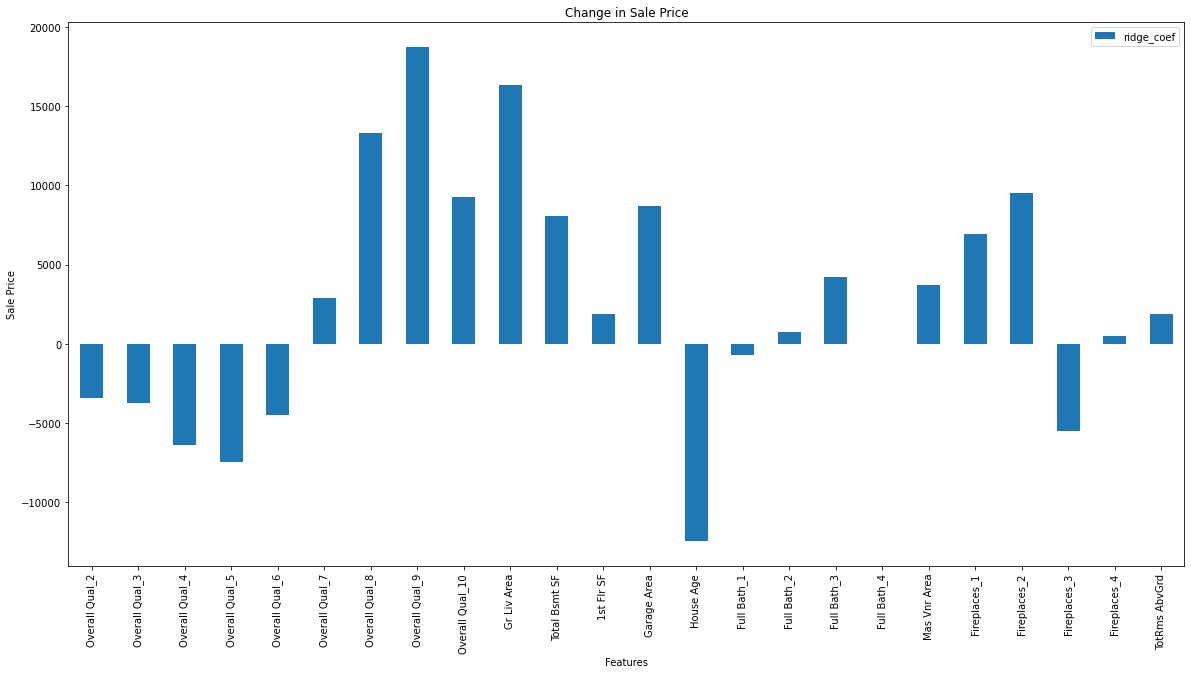

In [263]:
ranking.plot(x="feature", y="ridge_coef", kind="bar", figsize= (20,10))
plt.title("Change in Sale Price")
plt.xlabel("Features")
plt.ylabel("Sale Price");

#### Based on the results, these are the findings for the houses in Ames:
- The older the houses, the lower the sale prices.
- For houses with overall quality of below average average (Overall Qual_6), the sale prices will be lower as well.
- A bigger ground living area will obviously result in a higher sale price.
- Surprisingly, a larger basement will fetch a higher sale price compared to a house with a larger 1st floor.
- Having a maximum of 2 fireplaces will yield the highest sale price. I suspect because fireplaces take up a lot of space and to have more than 2 fireplaces, you need to have a large living area. Based on the data, about 50% of the houses do not have a fireplace. This means that having more than 1 fireplace is actually a luxury.
- The more full bathrooms there are, the higher the sale price (up to 3 full bathrooms).

## Business Analysis

### Selecting the 3 Neighborhoods to Model

In [116]:
#import data file
df2 = pd.read_csv('datasets/cleaned_train.csv')
df2.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,Sale Type,SalePrice,House Age,has 2nd floor,has basement,has fireplace,has garage,has pool
0,109,60,RL,79.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,No,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,2010,WD,130500,34,1,1,0,1,0
1,544,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,2009,WD,220000,13,1,1,1,1,0
2,153,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,No,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,2010,WD,109000,57,0,1,0,1,0
3,318,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,No,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,2010,WD,174000,4,1,1,0,1,0
4,255,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,No,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,2010,WD,138500,110,1,1,0,1,0


In [117]:
#sorting the number of houses in the neighborhoods in descending order and counting them
df2['Neighborhood'].value_counts()

NAmes      310
CollgCr    179
OldTown    163
Edwards    141
NridgHt    120
Somerst    120
Gilbert    111
Sawyer     111
NWAmes      87
SawyerW     86
Mitchel     82
BrkSide     75
Crawfor     70
IDOTRR      68
NoRidge     48
Timber      47
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

#### The 3 neighbourhoods that are selected are: NAmes, CollgCr, OldTown and based on the number of rows of data available. The features that we are interested to investigate if any increase will result in higher sale price, are the bedrooms, full bathroom, basement, kitchen

In [118]:
df3 = df2[df2["Neighborhood"] == 'NAmes']
df4 = df2[df2["Neighborhood"] == 'CollgCr']
df5 = df2[df2["Neighborhood"] == 'OldTown']

In [119]:
df3.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,Sale Type,SalePrice,House Age,has 2nd floor,has basement,has fireplace,has garage,has pool
2,153,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,No,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,2010,WD,109000,57,0,1,0,1,0
5,138,20,RL,137.0,16492,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,0,2010,WD,190000,44,0,1,1,1,0
7,145,20,RL,75.0,12160,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,No,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,0,2010,COD,142000,51,0,1,0,1,0
9,1956,60,RL,70.0,11606,Pave,IR1,HLS,AllPub,Inside,Sev,NAmes,Norm,Norm,1Fam,2Story,5,5,1969,1969,Gable,CompShg,Plywood,Plywood,BrkFace,192.0,TA,TA,PConc,Gd,TA,Av,Rec,650.0,Unf,0.0,390.0,1040.0,GasA,TA,Y,SBrkr,1040,1040,0,2080,0.0,1.0,1,2,5,1,Fa,9,Typ,2,TA,Attchd,1969.0,Unf,2.0,504.0,TA,TA,Y,335,0,0,0,0,0,0,2007,WD,135000,38,1,1,1,1,0
24,624,20,RL,92.0,10573,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1961,1961,Hip,CompShg,MetalSd,MetalSd,BrkFace,3.0,TA,TA,CBlock,TA,TA,No,Rec,1312.0,Unf,0.0,141.0,1453.0,GasA,Ex,Y,SBrkr,1453,0,0,1453,1.0,0.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1961.0,RFn,2.0,530.0,TA,TA,Y,0,49,0,0,288,0,0,2009,WD,187500,48,0,1,1,1,0


In [120]:
df4.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,Sale Type,SalePrice,House Age,has 2nd floor,has basement,has fireplace,has garage,has pool
11,2752,20,RL,64.0,7488,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,393.0,Unf,0.0,815.0,1208.0,GasA,Ex,Y,SBrkr,1208,0,0,1208,0.0,0.0,2,0,2,1,Gd,6,Typ,0,No,Attchd,2005.0,RFn,2.0,632.0,TA,TA,Y,105,58,0,0,0,0,0,2006,WD,183600,1,0,1,0,1,0
14,1480,20,RL,74.0,9627,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,24.0,Unf,0.0,1327.0,1351.0,GasA,Ex,Y,SBrkr,1361,0,0,1361,0.0,0.0,2,0,3,1,Gd,6,Typ,0,No,Attchd,2007.0,RFn,2.0,610.0,TA,TA,Y,0,50,0,0,0,0,0,2008,WD,193000,1,0,1,0,1,0
33,820,20,RL,79.0,10637,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,336.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1288.0,Unf,0.0,417.0,1705.0,GasA,Ex,Y,SBrkr,1718,0,0,1718,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,RFn,3.0,826.0,TA,TA,Y,208,44,0,0,0,0,0,2009,WD,297000,2,0,1,1,1,0
38,2125,20,RL,60.0,8428,Pave,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,7,1994,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,PConc,Gd,Gd,No,GLQ,420.0,Unf,0.0,570.0,990.0,GasA,Ex,Y,SBrkr,990,0,0,990,1.0,0.0,1,0,3,1,TA,5,Typ,0,No,Detchd,1995.0,Unf,1.0,384.0,TA,TA,Y,256,0,0,0,0,0,0,2007,WD,146000,13,0,1,0,1,0
88,2154,60,RL,84.0,15295,Pave,IR3,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1996,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,254.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,762.0,Unf,0.0,98.0,860.0,GasA,Ex,Y,SBrkr,1212,780,0,1992,1.0,0.0,2,1,3,1,Gd,7,Min2,2,TA,Attchd,1996.0,RFn,2.0,608.0,TA,TA,Y,225,32,0,0,0,0,0,2007,WD,211000,11,1,1,1,1,0


In [121]:
df5.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,Sale Type,SalePrice,House Age,has 2nd floor,has basement,has fireplace,has garage,has pool
8,1942,20,RL,85.0,15783,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,No,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,0,324,0,0,0,0,400,2007,WD,112500,55,0,1,0,1,0
16,1311,70,RM,34.0,4571,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,5,1916,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,624.0,624.0,GasA,Fa,N,SBrkr,624,720,0,1344,0.0,0.0,1,0,4,1,TA,7,Typ,0,No,Detchd,1916.0,Unf,3.0,513.0,Fa,Fa,Y,0,0,96,0,0,0,0,2008,COD,98000,92,1,1,0,1,0
41,1325,50,RM,81.0,12150,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,5,1954,1954,Gable,CompShg,MetalSd,MetalSd,BrkFace,335.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,1050.0,1050.0,GasA,Ex,N,FuseF,1050,745,0,1795,0.0,0.0,2,0,4,1,TA,7,Typ,0,No,Attchd,1954.0,Unf,1.0,352.0,Fa,TA,Y,0,0,0,0,0,0,0,2008,WD,131500,54,1,1,0,1,0
61,1295,50,RM,81.0,7308,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,5,5,1920,1950,Gable,CompShg,WdShing,Wd Shng,None,0.0,Fa,Fa,BrkTil,TA,TA,No,Rec,360.0,Unf,0.0,576.0,936.0,GasA,Gd,N,FuseA,960,780,0,1740,0.0,0.0,1,0,2,1,Ex,6,Typ,1,Gd,Detchd,1920.0,Unf,1.0,225.0,Fa,Fa,N,0,0,236,0,0,0,0,2008,WD,122250,88,1,1,1,1,0
78,1993,70,RM,35.0,4571,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,7,1910,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,168.0,Unf,0.0,448.0,616.0,GasA,Ex,Y,SBrkr,616,616,0,1232,0.0,0.0,1,0,3,1,TA,6,Typ,0,No,Detchd,1920.0,Unf,2.0,480.0,Fa,Fa,Y,280,0,143,0,0,0,0,2007,WD,114000,97,1,1,0,1,0


### Encoding Ordinal Features

In [122]:
df3['Lot Shape'] = df3['Lot Shape'].replace({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3})
df3['Utilities'] = df3['Utilities'].replace({'AllPub':0, 'NoSewr':1, 'NoSeWa':2, 'ELO':3})
df3['Land Slope'] = df3['Land Slope'].replace({'Gtl':0, 'Mod':1, 'Sev':2})
df3['Bsmt Qual'] = df3['Bsmt Qual'].replace({'Gd':0, 'TA':1, 'Ex':2, 'No':3,'None':3, 'NA':3, 'Fa':4, 'Po' : 5})
df3['Bsmt Cond'] = df3['Bsmt Cond'].replace({'TA':0, 'Gd':1, 'No':2, 'None':2, 'NA':2, 'Fa':3,'Po':4, 'Ex' : 5})
df3['Exter Qual'] = df3['Exter Qual'].replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3, 'Po':4})
df3['Exter Cond'] = df3['Exter Cond'].replace({'TA':0, 'Gd':1, 'Fa':2, 'Po':3,'Ex':4})
df3['Bsmt Exposure'] = df3['Bsmt Exposure'].replace({'No':0, 'Gd':1, 'Mn':2, 'Av':3,'No':4,'None':4, 'NA':4})
df3['BsmtFin Type 1'] = df3['BsmtFin Type 1'].replace({'GLQ':0, 'ALQ':1, 'Unf':2, 'Rec':3, 'BLQ':4, 'No':5, 'None':5, 'NA':5,'LwQ':6})
df3['BsmtFin Type 2'] = df3['BsmtFin Type 2'].replace({'Unf':0, 'BLQ':1, 'No':2, 'None':2, 'NA':2,'ALQ':3, 'Rec':4, 'LwQ':5, 'GLQ':6})
df3['Heating QC'] = df3['Heating QC'].replace({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4})
df3['Electrical'] = df3['Electrical'].replace({'SBrkr':0, 'FuseF':1, 'FuseA':2, 'FuseP':3, 'Mix':4})
df3['Kitchen Qual'] = df3['Kitchen Qual'].replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3, 'Po':4})
df3['Functional'] = df3['Functional'].replace({'Typ':0, 'Min1':1, 'Maj1':2, 'Min2':3, 'Mod':4, 'Maj2':5, 'Sev':6, 'Sal':7})
df3['Fireplace Qu'] = df3['Fireplace Qu'].replace({'No':0,'None':0, 'NA':0, 'TA':1, 'Gd':2, 'Fa':3, 'Ex':4, 'Po':5})
df3['Garage Finish'] = df3['Garage Finish'].replace({'RFn':0, 'Unf':1, 'Fin':2, 'None':3, 'NA':3, 'No':3})
df3['Garage Qual'] = df3['Garage Qual'].replace({'TA':0, 'Fa':1, 'Gd':2, 'No':3, 'Ex':4, 'Po':5})
df3['Garage Cond'] = df3['Garage Cond'].replace({'TA':0, 'Fa':1, 'No':2,'None':2, 'NA':2, 'Gd':3, 'Po':4, 'Ex':5})
df3['Paved Drive'] = df3['Paved Drive'].replace({'Y':0, 'N':1, 'P':2})

In [123]:
df4['Lot Shape'] = df4['Lot Shape'].replace({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3})
df4['Utilities'] = df4['Utilities'].replace({'AllPub':0, 'NoSewr':1, 'NoSeWa':2, 'ELO':3})
df4['Land Slope'] = df4['Land Slope'].replace({'Gtl':0, 'Mod':1, 'Sev':2})
df4['Bsmt Qual'] = df4['Bsmt Qual'].replace({'Gd':0, 'TA':1, 'Ex':2, 'No':3,'None':3, 'NA':3, 'Fa':4, 'Po' : 5})
df4['Bsmt Cond'] = df4['Bsmt Cond'].replace({'TA':0, 'Gd':1, 'No':2, 'None':2, 'NA':2, 'Fa':3,'Po':4, 'Ex' : 5})
df4['Exter Qual'] = df4['Exter Qual'].replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3, 'Po':4})
df4['Exter Cond'] = df4['Exter Cond'].replace({'TA':0, 'Gd':1, 'Fa':2, 'Po':3,'Ex':4})
df4['Bsmt Exposure'] = df4['Bsmt Exposure'].replace({'No':0, 'Gd':1, 'Mn':2, 'Av':3,'No':4,'None':4, 'NA':4})
df4['BsmtFin Type 1'] = df4['BsmtFin Type 1'].replace({'GLQ':0, 'ALQ':1, 'Unf':2, 'Rec':3, 'BLQ':4, 'No':5, 'None':5, 'NA':5,'LwQ':6})
df4['BsmtFin Type 2'] = df4['BsmtFin Type 2'].replace({'Unf':0, 'BLQ':1, 'No':2, 'None':2, 'NA':2,'ALQ':3, 'Rec':4, 'LwQ':5, 'GLQ':6})
df4['Heating QC'] = df4['Heating QC'].replace({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4})
df4['Electrical'] = df4['Electrical'].replace({'SBrkr':0, 'FuseF':1, 'FuseA':2, 'FuseP':3, 'Mix':4})
df4['Kitchen Qual'] = df4['Kitchen Qual'].replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3, 'Po':4})
df4['Functional'] = df4['Functional'].replace({'Typ':0, 'Min1':1, 'Maj1':2, 'Min2':3, 'Mod':4, 'Maj2':5, 'Sev':6, 'Sal':7})
df4['Fireplace Qu'] = df4['Fireplace Qu'].replace({'No':0,'None':0, 'NA':0, 'TA':1, 'Gd':2, 'Fa':3, 'Ex':4, 'Po':5})
df4['Garage Finish'] = df4['Garage Finish'].replace({'RFn':0, 'Unf':1, 'Fin':2, 'None':3, 'NA':3, 'No':3})
df4['Garage Qual'] = df4['Garage Qual'].replace({'TA':0, 'Fa':1, 'Gd':2, 'No':3, 'Ex':4, 'Po':5})
df4['Garage Cond'] = df4['Garage Cond'].replace({'TA':0, 'Fa':1, 'No':2,'None':2, 'NA':2, 'Gd':3, 'Po':4, 'Ex':5})
df4['Paved Drive'] = df4['Paved Drive'].replace({'Y':0, 'N':1, 'P':2})

In [124]:
df5['Lot Shape'] = df5['Lot Shape'].replace({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3})
df5['Utilities'] = df5['Utilities'].replace({'AllPub':0, 'NoSewr':1, 'NoSeWa':2, 'ELO':3})
df5['Land Slope'] = df5['Land Slope'].replace({'Gtl':0, 'Mod':1, 'Sev':2})
df5['Bsmt Qual'] = df5['Bsmt Qual'].replace({'Gd':0, 'TA':1, 'Ex':2, 'No':3,'None':3, 'NA':3, 'Fa':4, 'Po' : 5})
df5['Bsmt Cond'] = df5['Bsmt Cond'].replace({'TA':0, 'Gd':1, 'No':2, 'None':2, 'NA':2, 'Fa':3,'Po':4, 'Ex' : 5})
df5['Exter Qual'] = df5['Exter Qual'].replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3, 'Po':4})
df5['Exter Cond'] = df5['Exter Cond'].replace({'TA':0, 'Gd':1, 'Fa':2, 'Po':3,'Ex':4})
df5['Bsmt Exposure'] = df5['Bsmt Exposure'].replace({'No':0, 'Gd':1, 'Mn':2, 'Av':3,'No':4,'None':4, 'NA':4})
df5['BsmtFin Type 1'] = df5['BsmtFin Type 1'].replace({'GLQ':0, 'ALQ':1, 'Unf':2, 'Rec':3, 'BLQ':4, 'No':5, 'None':5, 'NA':5,'LwQ':6})
df5['BsmtFin Type 2'] = df5['BsmtFin Type 2'].replace({'Unf':0, 'BLQ':1, 'No':2, 'None':2, 'NA':2,'ALQ':3, 'Rec':4, 'LwQ':5, 'GLQ':6})
df5['Heating QC'] = df5['Heating QC'].replace({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4})
df5['Electrical'] = df5['Electrical'].replace({'SBrkr':0, 'FuseF':1, 'FuseA':2, 'FuseP':3, 'Mix':4})
df5['Kitchen Qual'] = df5['Kitchen Qual'].replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3, 'Po':4})
df5['Functional'] = df5['Functional'].replace({'Typ':0, 'Min1':1, 'Maj1':2, 'Min2':3, 'Mod':4, 'Maj2':5, 'Sev':6, 'Sal':7})
df5['Fireplace Qu'] = df5['Fireplace Qu'].replace({'No':0,'None':0, 'NA':0, 'TA':1, 'Gd':2, 'Fa':3, 'Ex':4, 'Po':5})
df5['Garage Finish'] = df5['Garage Finish'].replace({'RFn':0, 'Unf':1, 'Fin':2, 'None':3, 'NA':3, 'No':3})
df5['Garage Qual'] = df5['Garage Qual'].replace({'TA':0, 'Fa':1, 'Gd':2, 'No':3, 'Ex':4, 'Po':5})
df5['Garage Cond'] = df5['Garage Cond'].replace({'TA':0, 'Fa':1, 'No':2,'None':2, 'NA':2, 'Gd':3, 'Po':4, 'Ex':5})
df5['Paved Drive'] = df5['Paved Drive'].replace({'Y':0, 'N':1, 'P':2})

In [125]:
#checking if encoded correctly
df3.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,Sale Type,SalePrice,House Age,has 2nd floor,has basement,has fireplace,has garage,has pool
2,153,20,RL,68.0,7922,Pave,0,Lvl,0,Inside,0,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,1,1,CBlock,1,0,4,0,731.0,0,0.0,326.0,1057.0,GasA,2,Y,0,1057,0,0,1057,1.0,0.0,1,0,3,1,0,5,0,0,0,Detchd,1953.0,1,1.0,246.0,0,0,0,0,52,0,0,0,0,0,2010,WD,109000,57,0,1,0,1,0
5,138,20,RL,137.0,16492,Pave,1,Lvl,0,Corner,0,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,0,0,CBlock,1,0,4,1,247.0,4,713.0,557.0,1517.0,GasA,0,Y,0,1888,0,0,1888,0.0,0.0,2,1,2,1,0,6,4,1,2,Attchd,1966.0,2,2.0,578.0,0,0,0,0,0,0,0,0,0,0,2010,WD,190000,44,0,1,1,1,0
7,145,20,RL,75.0,12160,Pave,1,Lvl,0,Inside,0,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,1,0,CBlock,1,0,4,3,1000.0,0,0.0,188.0,1188.0,GasA,3,Y,0,1188,0,0,1188,1.0,0.0,1,0,3,1,1,6,0,0,0,Attchd,1959.0,0,2.0,531.0,0,0,0,0,0,0,0,0,0,0,2010,COD,142000,51,0,1,0,1,0
9,1956,60,RL,70.0,11606,Pave,1,HLS,0,Inside,2,NAmes,Norm,Norm,1Fam,2Story,5,5,1969,1969,Gable,CompShg,Plywood,Plywood,BrkFace,192.0,1,0,PConc,0,0,3,3,650.0,0,0.0,390.0,1040.0,GasA,2,Y,0,1040,1040,0,2080,0.0,1.0,1,2,5,1,3,9,0,2,1,Attchd,1969.0,1,2.0,504.0,0,0,0,335,0,0,0,0,0,0,2007,WD,135000,38,1,1,1,1,0
24,624,20,RL,92.0,10573,Pave,1,Lvl,0,Corner,0,NAmes,Norm,Norm,1Fam,1Story,6,6,1961,1961,Hip,CompShg,MetalSd,MetalSd,BrkFace,3.0,1,0,CBlock,1,0,4,3,1312.0,0,0.0,141.0,1453.0,GasA,0,Y,0,1453,0,0,1453,1.0,0.0,2,0,3,1,1,6,0,1,1,Attchd,1961.0,0,2.0,530.0,0,0,0,0,49,0,0,288,0,0,2009,WD,187500,48,0,1,1,1,0


In [126]:
#checking if encoded correctly
df4.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,Sale Type,SalePrice,House Age,has 2nd floor,has basement,has fireplace,has garage,has pool
11,2752,20,RL,64.0,7488,Pave,1,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,1Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,0,0,PConc,0,0,3,0,393.0,0,0.0,815.0,1208.0,GasA,0,Y,0,1208,0,0,1208,0.0,0.0,2,0,2,1,0,6,0,0,0,Attchd,2005.0,0,2.0,632.0,0,0,0,105,58,0,0,0,0,0,2006,WD,183600,1,0,1,0,1,0
14,1480,20,RL,74.0,9627,Pave,0,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,0,0,PConc,0,0,3,0,24.0,0,0.0,1327.0,1351.0,GasA,0,Y,0,1361,0,0,1361,0.0,0.0,2,0,3,1,0,6,0,0,0,Attchd,2007.0,0,2.0,610.0,0,0,0,0,50,0,0,0,0,0,2008,WD,193000,1,0,1,0,1,0
33,820,20,RL,79.0,10637,Pave,0,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,1Story,8,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,336.0,0,0,PConc,2,0,1,0,1288.0,0,0.0,417.0,1705.0,GasA,0,Y,0,1718,0,0,1718,1.0,0.0,2,0,3,1,0,7,0,1,2,Attchd,2007.0,0,3.0,826.0,0,0,0,208,44,0,0,0,0,0,2009,WD,297000,2,0,1,1,1,0
38,2125,20,RL,60.0,8428,Pave,2,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,1Story,5,7,1994,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,1,1,PConc,0,1,4,0,420.0,0,0.0,570.0,990.0,GasA,0,Y,0,990,0,0,990,1.0,0.0,1,0,3,1,1,5,0,0,0,Detchd,1995.0,1,1.0,384.0,0,0,0,256,0,0,0,0,0,0,2007,WD,146000,13,0,1,0,1,0
88,2154,60,RL,84.0,15295,Pave,3,Lvl,0,Corner,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,1996,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,254.0,0,0,PConc,0,0,2,0,762.0,0,0.0,98.0,860.0,GasA,0,Y,0,1212,780,0,1992,1.0,0.0,2,1,3,1,0,7,3,2,1,Attchd,1996.0,0,2.0,608.0,0,0,0,225,32,0,0,0,0,0,2007,WD,211000,11,1,1,1,1,0


In [127]:
#checking if encoded correctly
df5.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,Sale Type,SalePrice,House Age,has 2nd floor,has basement,has fireplace,has garage,has pool
8,1942,20,RL,85.0,15783,Pave,0,Lvl,0,Inside,0,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,1,0,CBlock,1,0,4,3,292.0,0,0.0,632.0,924.0,GasA,2,Y,0,924,0,0,924,0.0,0.0,1,0,2,1,1,6,0,0,0,Detchd,1952.0,1,1.0,420.0,0,0,0,0,324,0,0,0,0,400,2007,WD,112500,55,0,1,0,1,0
16,1311,70,RM,34.0,4571,Pave,0,Lvl,0,Inside,0,OldTown,Norm,Norm,1Fam,2Story,5,5,1916,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,1,0,BrkTil,1,0,4,2,0.0,0,0.0,624.0,624.0,GasA,3,N,0,624,720,0,1344,0.0,0.0,1,0,4,1,1,7,0,0,0,Detchd,1916.0,1,3.0,513.0,1,1,0,0,0,96,0,0,0,0,2008,COD,98000,92,1,1,0,1,0
41,1325,50,RM,81.0,12150,Pave,0,Lvl,0,Inside,0,OldTown,Norm,Norm,1Fam,1.5Fin,5,5,1954,1954,Gable,CompShg,MetalSd,MetalSd,BrkFace,335.0,1,0,BrkTil,1,0,4,2,0.0,0,0.0,1050.0,1050.0,GasA,0,N,1,1050,745,0,1795,0.0,0.0,2,0,4,1,1,7,0,0,0,Attchd,1954.0,1,1.0,352.0,1,0,0,0,0,0,0,0,0,0,2008,WD,131500,54,1,1,0,1,0
61,1295,50,RM,81.0,7308,Pave,0,Lvl,0,Corner,0,OldTown,Artery,Norm,1Fam,1.5Fin,5,5,1920,1950,Gable,CompShg,WdShing,Wd Shng,None,0.0,3,2,BrkTil,1,0,4,3,360.0,0,0.0,576.0,936.0,GasA,1,N,2,960,780,0,1740,0.0,0.0,1,0,2,1,2,6,0,1,2,Detchd,1920.0,1,1.0,225.0,1,1,1,0,0,236,0,0,0,0,2008,WD,122250,88,1,1,1,1,0
78,1993,70,RM,35.0,4571,Pave,0,Lvl,0,Inside,0,OldTown,Norm,Norm,1Fam,2Story,5,7,1910,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,1,0,BrkTil,1,0,4,4,168.0,0,0.0,448.0,616.0,GasA,0,Y,0,616,616,0,1232,0.0,0.0,1,0,3,1,1,6,0,0,0,Detchd,1920.0,1,2.0,480.0,1,1,0,280,0,143,0,0,0,0,2007,WD,114000,97,1,1,0,1,0


### Get Dummies

In [128]:
df3 = pd.get_dummies(df3, columns=["MS Zoning", "Lot Shape", "Utilities", "Land Slope", "Overall Qual", "Overall Cond", "Exter Qual", "Exter Cond", "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2", "Heating QC", "Electrical", "Full Bath", "Half Bath", "Bedroom AbvGr", "Kitchen AbvGr", "Kitchen Qual", "Functional", "Fireplaces", "Fireplace Qu", "Garage Finish", "Garage Qual", "Garage Cond", "Paved Drive", "Street" ,"Land Contour" ,"Lot Config", "Condition 1" ,"Condition 2", "Bldg Type","House Style" ,"Roof Style", "Roof Matl" ,"Exterior 1st" ,"Exterior 2nd", "Mas Vnr Type", "Foundation" ,"Heating", "Central Air", "Garage Type" ,"Sale Type"], drop_first=True)
df4 = pd.get_dummies(df4, columns=["MS Zoning", "Lot Shape", "Utilities", "Land Slope", "Overall Qual", "Overall Cond", "Exter Qual", "Exter Cond", "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2", "Heating QC", "Electrical", "Full Bath", "Half Bath", "Bedroom AbvGr", "Kitchen AbvGr", "Kitchen Qual", "Functional", "Fireplaces", "Fireplace Qu", "Garage Finish", "Garage Qual", "Garage Cond", "Paved Drive", "Street" ,"Land Contour" ,"Lot Config", "Condition 1" ,"Condition 2", "Bldg Type","House Style" ,"Roof Style", "Roof Matl" ,"Exterior 1st" ,"Exterior 2nd", "Mas Vnr Type", "Foundation" ,"Heating", "Central Air", "Garage Type" ,"Sale Type"], drop_first=True)
df5 = pd.get_dummies(df5, columns=["MS Zoning", "Lot Shape", "Utilities", "Land Slope", "Overall Qual", "Overall Cond", "Exter Qual", "Exter Cond", "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2", "Heating QC", "Electrical", "Full Bath", "Half Bath", "Bedroom AbvGr", "Kitchen AbvGr", "Kitchen Qual", "Functional", "Fireplaces", "Fireplace Qu", "Garage Finish", "Garage Qual", "Garage Cond", "Paved Drive", "Street" ,"Land Contour" ,"Lot Config", "Condition 1" ,"Condition 2", "Bldg Type","House Style" ,"Roof Style", "Roof Matl" ,"Exterior 1st" ,"Exterior 2nd", "Mas Vnr Type", "Foundation" ,"Heating", "Central Air", "Garage Type" ,"Sale Type"], drop_first=True)

In [129]:
#check if encoded correctly
df3.head()

,Id,MS SubClass,Lot Frontage,Lot Area,Neighborhood,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,TotRms AbvGrd,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,House Age,has 2nd floor,has basement,has fireplace,has garage,has pool,MS Zoning_RL,Lot Shape_1,Lot Shape_2,Lot Shape_3,Land Slope_1,Land Slope_2,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,Exter Qual_1,Exter Qual_2,Exter Qual_3,Exter Cond_1,Exter Cond_2,Bsmt Qual_1,Bsmt Qual_4,Bsmt Cond_1,Bsmt Cond_3,Bsmt Exposure_2,Bsmt Exposure_3,Bsmt Exposure_4,BsmtFin Type 1_1,BsmtFin Type 1_2,BsmtFin Type 1_3,BsmtFin Type 1_4,BsmtFin Type 1_6,BsmtFin Type 2_1,BsmtFin Type 2_3,BsmtFin Type 2_4,BsmtFin Type 2_5,BsmtFin Type 2_6,Heating QC_1,Heating QC_2,Heating QC_3,Electrical_1,Electrical_2,Electrical_3,Full Bath_2,Full Bath_3,Half Bath_1,Half Bath_2,Bedroom AbvGr_2,Bedroom AbvGr_3,Bedroom AbvGr_4,Bedroom AbvGr_5,Bedroom AbvGr_6,Kitchen AbvGr_2,Kitchen Qual_1,Kitchen Qual_2,Kitchen Qual_3,Functional_1,Functional_3,Functional_4,Functional_6,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplace Qu_1,Fireplace Qu_2,Fireplace Qu_3,Fireplace Qu_5,Garage Finish_1,Garage Finish_2,Garage Finish_3,Garage Qual_1,Garage Qual_2,Garage Qual_3,Garage Qual_4,Garage Cond_1,Garage Cond_2,Garage Cond_3,Garage Cond_5,Paved Drive_1,Paved Drive_2,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_Inside,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Matl_Tar&Grv,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Heating_GasW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_No,Sale Type_CWD,Sale Type_ConLD,Sale Type_ConLI,Sale Type_WD
2,153,20,68.0,7922,NAmes,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,5,1953.0,1.0,246.0,0,52,0,0,0,0,0,2010,109000,57,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
5,138,20,137.0,16492,NAmes,1966,2002,0.0,247.0,713.0,557.0,1517.0,1888,0,0,1888,0.0,0.0,6,1966.0,2.0,578.0,0,0,0,0,0,0,0,2010,190000,44,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
7,145,20,75.0,12160,NAmes,1959,1959,180.0,1000.0,0.0,188.0,1188.0,1188,0,0,1188,1.0,0.0,6,1959.0,2.0,531.0,0,0,0,0,0,0,0,2010,142000,51,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1

In [130]:
#check if encoded correctly
df4.head()

,Id,MS SubClass,Lot Frontage,Lot Area,Neighborhood,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,TotRms AbvGrd,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,House Age,has 2nd floor,has basement,has fireplace,has garage,has pool,MS Zoning_RM,Lot Shape_1,Lot Shape_2,Lot Shape_3,Land Slope_1,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Exter Qual_1,Exter Qual_2,Exter Cond_1,Bsmt Qual_1,Bsmt Qual_2,Bsmt Cond_1,Bsmt Cond_5,Bsmt Exposure_2,Bsmt Exposure_3,Bsmt Exposure_4,BsmtFin Type 1_1,BsmtFin Type 1_2,BsmtFin Type 1_3,BsmtFin Type 1_4,BsmtFin Type 1_6,BsmtFin Type 2_1,BsmtFin Type 2_3,BsmtFin Type 2_4,BsmtFin Type 2_5,BsmtFin Type 2_6,Heating QC_1,Heating QC_2,Full Bath_2,Half Bath_1,Bedroom AbvGr_2,Bedroom AbvGr_3,Bedroom AbvGr_4,Kitchen AbvGr_2,Kitchen Qual_1,Kitchen Qual_2,Functional_3,Fireplaces_1,Fireplaces_2,Fireplace Qu_1,Fireplace Qu_2,Fireplace Qu_3,Fireplace Qu_4,Garage Finish_1,Garage Finish_2,Garage Finish_3,Garage Qual_2,Garage Qual_3,Garage Cond_1,Garage Cond_2,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Norm,Condition 1_PosN,Bldg Type_Duplex,Bldg Type_TwnhsE,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Hip,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_WdShing,Exterior 2nd_HdBoard,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Garage Type_BuiltIn,Garage Type_Detchd,Garage Type_No,Sale Type_ConLw,Sale Type_New,Sale Type_WD
11,2752,20,64.0,7488,CollgCr,2005,2005,0.0,393.0,0.0,815.0,1208.0,1208,0,0,1208,0.0,0.0,6,2005.0,2.0,632.0,105,58,0,0,0,0,0,2006,183600,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
14,1480,20,74.0,9627,CollgCr,2007,2007,0.0,24.0,0.0,1327.0,1351.0,1361,0,0,1361,0.0,0.0,6,2007.0,2.0,610.0,0,50,0,0,0,0,0,2008,193000,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
33,820,20,79.0,10637,CollgCr,2007,2008,336.0,1288.0,0.0,417.0,1705.0,1718,0,0,1718,1.0,0.0,7,2007.0,3.0,826.0,208,44,0,0,0,0,0,2009,297000,2,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
38,2125,20,60.0,8428,CollgCr,1994,1994,0.0,420.0,0.0,570.0,990.0,990,0,0,990,1.0,0.0,5,1995.0,1.0,384.0,256,0,0,0,0,0,0,2007,146000,13,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
88,2154,60,84.0,15295,CollgCr,1996,2002,254.0,762.0,0.0,98.0,860.0,1212,780,0,1992,1.0,0.0,7,1996.0,2.0,608.0,225,32,0,0,0,0,0,2007,211000,11,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [131]:
#check if encoded correctly
df5.head()

,Id,MS SubClass,Lot Frontage,Lot Area,Neighborhood,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,TotRms AbvGrd,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,House Age,has 2nd floor,has basement,has fireplace,has garage,has pool,MS Zoning_RM,Lot Shape_1,Lot Shape_2,Lot Shape_3,Land Slope_1,Land Slope_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_10,Overall Cond_2,Overall Cond_3,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,Exter Qual_1,Exter Qual_2,Exter Qual_3,Exter Cond_1,Exter Cond_2,Exter Cond_4,Bsmt Qual_1,Bsmt Qual_4,Bsmt Cond_1,Bsmt Cond_3,Bsmt Cond_4,Bsmt Exposure_2,Bsmt Exposure_3,Bsmt Exposure_4,BsmtFin Type 1_1,BsmtFin Type 1_2,BsmtFin Type 1_3,BsmtFin Type 1_4,BsmtFin Type 1_6,BsmtFin Type 2_1,BsmtFin Type 2_3,BsmtFin Type 2_4,BsmtFin Type 2_5,Heating QC_1,Heating QC_2,Heating QC_3,Electrical_1,Electrical_2,Electrical_3,Full Bath_2,Full Bath_3,Half Bath_1,Bedroom AbvGr_2,Bedroom AbvGr_3,Bedroom AbvGr_4,Bedroom AbvGr_5,Kitchen AbvGr_2,Kitchen AbvGr_3,Kitchen Qual_1,Kitchen Qual_2,Kitchen Qual_3,Functional_1,Functional_2,Functional_3,Functional_4,Functional_5,Functional_6,Fireplaces_1,Fireplaces_2,Fireplace Qu_1,Fireplace Qu_2,Fireplace Qu_4,Fireplace Qu_5,Garage Finish_1,Garage Finish_2,Garage Finish_3,Garage Qual_1,Garage Qual_2,Garage Qual_3,Garage Qual_4,Garage Cond_1,Garage Cond_2,Garage Cond_3,Garage Cond_4,Paved Drive_1,Paved Drive_2,Land Contour_HLS,Land Contour_Lvl,Lot Config_Inside,Condition 1_Feedr,Condition 1_Norm,Condition 1_RRAn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Matl_WdShngl,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_MetalSd,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Heating_GasW,Heating_Grav,Heating_OthW,Central Air_Y,Garage Type_Attchd,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_No,Sale Type_CWD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_Oth,Sale Type_WD
8,1942,20,85.0,15783,OldTown,1952,1952,0.0,292.0,0.0,632.0,924.0,924,0,0,924,0.0,0.0,6,1952.0,1.0,420.0,0,324,0,0,0,0,400,2007,112500,55,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
16,1311,70,34.0,4571,OldTown,1916,1950,0.0,0.0,0.0,624.0,624.0,624,720,0,1344,0.0,0.0,7,1916.0,3.0,513.0,0,0,96,0,0,0,0,2008,98000,92,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
41,1325,50,81.0,12150,OldTown,1954,1954,335.0,0.0,0.0,1050.0,1050.0,1050,745,0,1795,0.0,0.0,7,1954.0,1.0,352.0,0,0,0,0,0,0,0,2008,131500,54,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,

### Modelling

### Feature Selection

In [132]:
#selected high correlation based on EDA as well as the features we would like to explore
X3 = df3[['Overall Qual_4', 'Overall Qual_5', 'Overall Qual_6', 'Overall Qual_7', 'Overall Qual_8', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'House Age', 'Full Bath_2', 'Full Bath_3', 'Mas Vnr Area', 'Fireplaces_1' , 'Fireplaces_2', 'Fireplaces_3', 'TotRms AbvGrd', 'Kitchen Qual_1', 'Kitchen Qual_2', 'Kitchen Qual_3', 'Kitchen AbvGr_2', 'Half Bath_1', 'Half Bath_2', 'Bedroom AbvGr_2', 'Bedroom AbvGr_3', 'Bedroom AbvGr_4', 'Bedroom AbvGr_5', 'Bedroom AbvGr_6', 'Bsmt Exposure_2', 'Bsmt Exposure_3', 'Bsmt Exposure_4']]
X4 = df4[['Overall Qual_5', 'Overall Qual_6', 'Overall Qual_7', 'Overall Qual_8', 'Overall Qual_9', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'House Age', 'Full Bath_2', 'Mas Vnr Area', 'Fireplaces_1' , 'Fireplaces_2', 'TotRms AbvGrd', 'Kitchen Qual_1', 'Kitchen Qual_2', 'Kitchen AbvGr_2', 'Half Bath_1', 'Bedroom AbvGr_2', 'Bedroom AbvGr_3', 'Bedroom AbvGr_4', 'Bsmt Exposure_2', 'Bsmt Exposure_3', 'Bsmt Exposure_4']]
X5 = df5[['Overall Qual_3', 'Overall Qual_4', 'Overall Qual_5', 'Overall Qual_6', 'Overall Qual_7', 'Overall Qual_8', 'Overall Qual_10', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'House Age', 'Full Bath_2', 'Full Bath_3', 'Mas Vnr Area', 'Fireplaces_1' , 'Fireplaces_2', 'TotRms AbvGrd', 'Kitchen Qual_1', 'Kitchen Qual_2', 'Kitchen Qual_3', 'Kitchen AbvGr_2', 'Kitchen AbvGr_3', 'Half Bath_1', 'Bedroom AbvGr_2', 'Bedroom AbvGr_3', 'Bedroom AbvGr_4', 'Bedroom AbvGr_5', 'Bsmt Exposure_2', 'Bsmt Exposure_3', 'Bsmt Exposure_4']]

y3 = df3['SalePrice']
y4 = df4['SalePrice']
y5 = df5['SalePrice']

### Train/Test Split

In [133]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state= 42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state= 42)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state= 42)

### StandardScaler and Transform

In [134]:
ss.fit(X3_train)
Z3_train = ss.transform(X3_train)
Z3_test = ss.transform(X3_test)

ss.fit(X4_train)
Z4_train = ss.transform(X4_train)
Z4_test = ss.transform(X4_test)

ss.fit(X5_train)
Z5_train = ss.transform(X5_train)
Z5_test = ss.transform(X5_test)

### Ridge Regression for NAmes

In [135]:
ridge_model.fit(Z3_train, y3_train)

Ridge(alpha=100, max_iter=50000)

In [136]:
y_pred_ridge_train3 = ridge_model.predict(Z3_train)
y_pred_ridge_train3

array([164322.81299466, 161967.91740449, 138431.2078326 , 125854.57587153,
       120484.15779166, 173426.16845209, 147816.3800807 , 141316.23455201,
       131621.29144877, 165852.44277834, 191030.22414603, 119466.55074229,
       138801.92688517, 163042.24733266, 164479.05409519, 168207.05126199,
       155985.48329217, 136133.62301146, 176721.09913974, 146445.67074547,
       124748.27601848, 135985.68699722, 116545.47485353, 139382.29591117,
       125115.83607215, 152328.46545191, 130021.37937082, 134292.89817658,
       173557.94549192, 167186.82868155, 121616.3655933 , 200080.86092677,
       158621.46741563, 150405.95317228, 156980.28810226, 128460.45160576,
       116617.19140608, 159723.13634728, 126711.45447124, 151226.50323761,
       104096.89959412, 146267.82160167, 146990.15398157, 132396.7613098 ,
       150583.32854106, 147840.49176672, 121290.52545618, 111108.6674415 ,
       104033.73822826, 123857.58699069, 142186.26769638, 110333.31552928,
       137101.83700157, 1

In [137]:
ridge_model.coef_

array([-1707.3166093 , -1235.93040561,  2323.79200131,  3170.10930432,
        2789.00329529,  5018.97163728,  2736.00034579,  3129.49557941,
        1900.56239282, -3876.30560499,  2079.81199457,     0.        ,
        2148.49426161,  2907.78405155,  3561.35766654,  1256.67082733,
        1623.2245547 , -2442.42287597,   476.31971134,  -947.25411888,
       -5693.40278833,  1733.02870151,  1064.55450483,  -710.11631328,
         164.07151211,   351.92211645,  1531.96810967,   246.93293917,
       -1504.24715571,  -772.27707457, -3103.59079885])

In [138]:
metrics.mean_squared_error(y3_train, y_pred_ridge_train3)

172952894.13188568

In [139]:
NAmes_prediction = ridge_model.predict(Z3_test)
NAmes_prediction

array([172139.96473466, 162684.99726222, 144890.5555356 , 151873.20837764,
       121541.35936868, 127679.80312635, 136857.69131149, 158259.16844802,
       129841.32557771, 157032.5313103 , 124316.27727859, 133748.52314524,
       140759.42428303, 147244.17353875, 144080.13777419, 156599.56230469,
       128083.39726438, 161657.27135924, 130194.06346483, 145954.72531126,
       117011.95001167, 144526.26849919, 126644.05037483, 129365.58023153,
       166711.03825943, 108077.27834543, 170058.64034569, 127528.9707758 ,
       140831.58839096, 140601.21380448, 121462.88541365, 193691.76688496,
       125650.59911748, 185351.94692566, 138625.69165159, 142473.2830115 ,
       122101.60947398, 148247.52060121, 124196.56608362, 167094.43122138,
       139271.55043168, 169913.45984719, 166214.58688854, 142604.97572191,
       143719.63210362, 267306.88907162, 121611.99673484, 144173.73140341,
       131899.64778184, 179335.55615921, 117474.32610268, 139958.41965725,
       132035.58615027, 1

In [140]:
# how the features that will affect the sale price
ranking_NAmes = pd.DataFrame(X3.columns,columns=['feature'])
ranking_NAmes['ridge_coef_NAmes'] = (ridge_model.coef_).T
ranking_NAmes.sort_values(by='ridge_coef_NAmes',ascending=False).head(15)

,feature,ridge_coef_NAmes
5,Gr Liv Area,5018.971637
14,Fireplaces_2,3561.357667
3,Overall Qual_7,3170.109304
7,1st Flr SF,3129.495579
13,Fireplaces_1,2907.784052
4,Overall Qual_8,2789.003295
6,Total Bsmt SF,2736.000346
2,Overall Qual_6,2323.792001
12,Mas Vnr Area,2148.494262
10,Full Bath_2,2079.811995


### Ridge Regression for CollgCr

In [141]:
ridge_model.fit(Z4_train, y4_train)

Ridge(alpha=100, max_iter=50000)

In [142]:
CollgCr_prediction = ridge_model.predict(Z4_test)
CollgCr_prediction

array([256114.60572611, 195598.11228695, 217470.09144421, 279146.96546746,
       212298.89677353, 305573.84833291, 195875.97028528, 224964.10880314,
       201095.45118368, 231523.56643693, 293073.54919103, 201502.01814817,
       347325.20573756, 149630.7288992 , 203700.31430502, 151546.70563751,
       237193.85944097, 154118.24858804, 217894.22815214, 207914.58164293,
       137300.34460185, 206083.16086136, 268188.75003217, 217248.55960524,
       151813.82781595, 255980.14127736, 186546.58245277, 234035.56380404,
       227913.28846898, 228073.47874304, 234245.42316135, 159338.30292398,
       183876.57292919, 193407.68011979, 217143.79299796, 223764.46420354,
       198265.58054289, 143032.12497579, 196127.44194025, 132637.31748948,
       168690.70333972, 202602.0779913 , 201559.83456915, 192335.14106428,
       218419.71309109, 243429.34835491, 341908.81921707, 155211.81458945,
       160449.49588729, 265094.16463855, 191935.79701647, 200691.08150374,
       172719.10828285, 1

In [143]:
# how the features that will affect the sale price
ranking_CollgCr = pd.DataFrame(X4.columns,columns=['feature'])
ranking_CollgCr['ridge_coef_CollgCr'] = (ridge_model.coef_).T
ranking_CollgCr.sort_values(by='ridge_coef_CollgCr',ascending=False).head(15)

,feature,ridge_coef_CollgCr
8,Garage Area,8067.808696
5,Gr Liv Area,8029.683503
6,Total Bsmt SF,6874.954112
4,Overall Qual_9,6855.476583
7,1st Flr SF,6398.660227
16,Kitchen Qual_2,4767.473280
11,Mas Vnr Area,4511.400605
14,TotRms AbvGrd,3919.116351
3,Overall Qual_8,3816.874133
18,Half Bath_1,3666.792992


### Ridge Regression for Old Town

In [144]:
ridge_model.fit(Z5_train, y5_train)

Ridge(alpha=100, max_iter=50000)

In [145]:
OldTown_prediction = ridge_model.predict(Z5_test)
OldTown_prediction

array([ 99793.04243418, 132351.39431092,  81987.10696105, 123103.53490059,
       164177.17152404, 118247.47024043, 114929.57306021, 146297.13323972,
       110139.09250602, 159449.95260877, 110974.88719536, 112914.64846415,
       171788.33805019, 114563.03479079, 143952.26409419, 125929.18505298,
       144963.2916064 , 122276.58715425,  98249.90900454, 129762.42781222,
       130812.85237209, 115729.34466294, 134753.16016357, 109605.24286425,
       132418.26344714, 120771.87043841,  99599.36145475, 136884.16880473,
       109391.62369243,  78273.4697739 , 107053.12104749, 136752.68995898,
        99670.65718344, 200841.16652532, 128773.08435682, 110890.58438445,
       110649.41586544, 104572.95587449, 143791.67961681, 106139.7557946 ,
       124420.98647943, 143565.37411151, 170679.10524281, 126477.51511357,
       128106.00524091, 116325.36390514, 142642.67044195,  89697.21561206,
       124318.4098896 ])

In [146]:
# how the features that will affect the sale price
ranking_OldTown = pd.DataFrame(X5.columns,columns=['feature'])
ranking_OldTown['ridge_coef_OldTown'] = (ridge_model.coef_).T
ranking_OldTown.sort_values(by='ridge_coef_OldTown',ascending=False).head(15)

,feature,ridge_coef_OldTown
6,Overall Qual_10,11191.714794
7,Gr Liv Area,6701.675111
16,Fireplaces_2,5771.028765
13,Full Bath_3,5367.924056
9,1st Flr SF,4457.204374
10,Garage Area,4396.979502
19,Kitchen Qual_2,3925.541657
17,TotRms AbvGrd,3493.441718
4,Overall Qual_7,3424.974054
23,Half Bath_1,2914.359564


In [147]:
ranking_final = ranking_NAmes.merge(ranking_CollgCr, on = "feature")
ranking_final

,feature,ridge_coef_NAmes,ridge_coef_CollgCr
0,Overall Qual_5,-1235.930406,-3026.842110
1,Overall Qual_6,2323.792001,-1292.339467
2,Overall Qual_7,3170.109304,-280.406669
3,Overall Qual_8,2789.003295,3816.874133
4,Gr Liv Area,5018.971637,8029.683503
5,Total Bsmt SF,2736.000346,6874.954112
6,1st Flr SF,3129.495579,6398.660227
7,Garage Area,1900.562393,8067.808696
8,House Age,-3876.305605,-3258.871466
9,Full Bath_2,2079.811995,3356.842868


In [148]:
ranking_final2 = ranking_final.merge(ranking_OldTown, on = "feature")
ranking_final2

,feature,ridge_coef_NAmes,ridge_coef_CollgCr,ridge_coef_OldTown
0,Overall Qual_5,-1235.930406,-3026.842110,-388.460143
1,Overall Qual_6,2323.792001,-1292.339467,538.368763
2,Overall Qual_7,3170.109304,-280.406669,3424.974054
3,Overall Qual_8,2789.003295,3816.874133,1525.217232
4,Gr Liv Area,5018.971637,8029.683503,6701.675111
5,Total Bsmt SF,2736.000346,6874.954112,2185.398871
6,1st Flr SF,3129.495579,6398.660227,4457.204374
7,Garage Area,1900.562393,8067.808696,4396.979502
8,House Age,-3876.305605,-3258.871466,660.617305
9,Full Bath_2,2079.811995,3356.842868,2018.187875


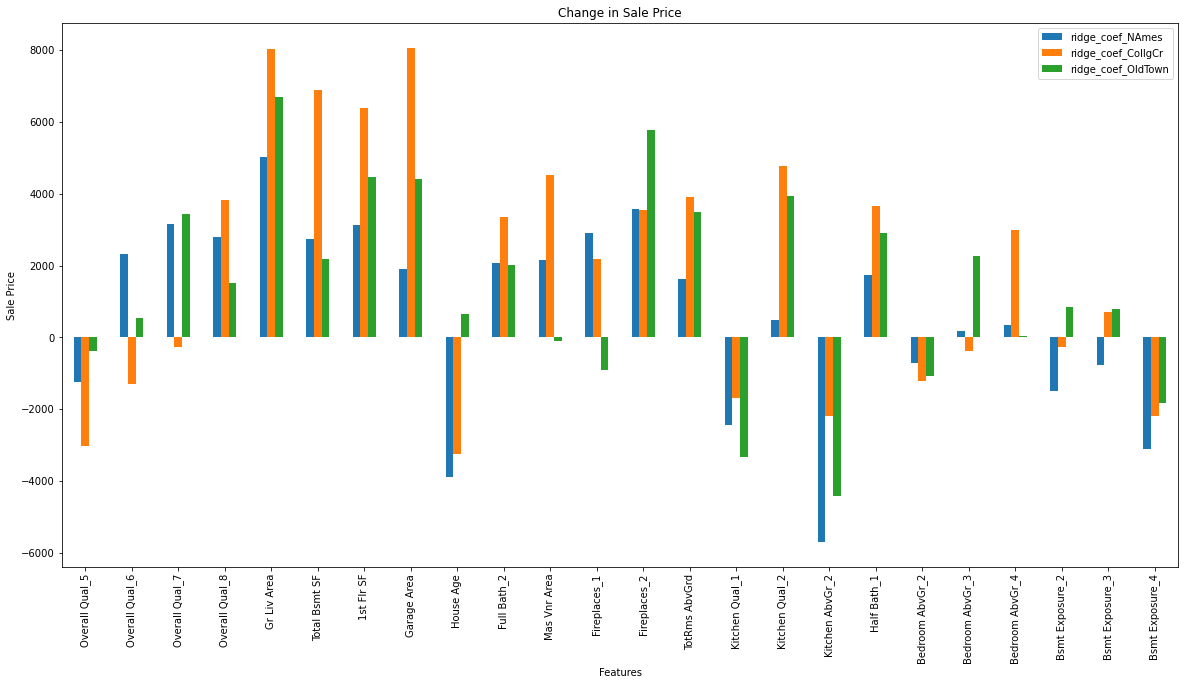

In [1055]:
ranking_final2.plot(x="feature", y=["ridge_coef_NAmes", "ridge_coef_CollgCr", "ridge_coef_OldTown"], kind="bar", figsize= (20,10))
plt.title("Change in Sale Price")
plt.xlabel("Features")
plt.ylabel("Sale Price");

#### From the results, these are the following findings:
- Obviously a larger living area will result in a higher sale price. 

- Ground Living area increase in sale price is very similar to 1st floor SF as the general area increases when the 1st floor SF increases.

- For quality, You can tell that from Above Average (Overall Qual_6) and above, the Sale Price tends to increase except for College Creek. It seems that the houses located at College Creek need to be at least Very Good (Overall Qual_8) in quality for the sale prices to increase.

- The larger the garage area, the higher the sale price.

- House Age does not seem to affect the sale prices for houses located at Old Town as much as the houses in the other areas.

- In terms of full and half bathrooms, the price increase does not seem to be very different. Perhaps to save space and cost, to consider building half bathrooms instead (difference is without shower facilities).

- For Basement Exposure, which refers to walkout or garden level walls, having no exposure will result in a significant drop in prices (Bsmt_Exposure_4).

## Recommendations

#### Limitations:
- There will always an issue of multicolinearity between the features.
- Difference in sale price could be driven by other external factors like economic status, location (distance away from amenities etc), season, mortage interest and political climate which were not taken into account. 
- The data collected does not have a good representation of all the neighborhoods in Ames. Some neighbourhoods have more rows compared to others.

#### Potential Study:
- Use models other than Linear/Lasso/Ridge Regression.

## Submission to Kaggle

In [264]:
df_test = pd.read_csv('datasets/cleaned_test_feature.csv')

In [265]:
df_test.head()

,Id,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,TotRms AbvGrd,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,House Age,has 2nd floor,has basement,has fireplace,has garage,has pool,MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Shape_1,Lot Shape_2,Lot Shape_3,Utilities_1,Land Slope_1,Land Slope_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,Overall Cond_2,Overall Cond_3,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,Exter Qual_1,Exter Qual_2,Exter Qual_3,Exter Cond_1,Exter Cond_2,Exter Cond_3,Exter Cond_4,Bsmt Qual_1,Bsmt Qual_2,Bsmt Qual_4,Bsmt Qual_5,Bsmt Cond_1,Bsmt Cond_3,Bsmt Exposure_2,Bsmt Exposure_3,Bsmt Exposure_4,BsmtFin Type 1_1,BsmtFin Type 1_2,BsmtFin Type 1_3,BsmtFin Type 1_4,BsmtFin Type 1_6,BsmtFin Type 2_1,BsmtFin Type 2_3,BsmtFin Type 2_4,BsmtFin Type 2_5,BsmtFin Type 2_6,Heating QC_1,Heating QC_2,Heating QC_3,Electrical_1,Electrical_2,Electrical_3,Full Bath_1,Full Bath_2,Full Bath_3,Full Bath_4,Half Bath_1,Half Bath_2,Bedroom AbvGr_1,Bedroom AbvGr_2,Bedroom AbvGr_3,Bedroom AbvGr_4,Bedroom AbvGr_5,Bedroom AbvGr_6,Kitchen AbvGr_1,Kitchen AbvGr_2,Kitchen AbvGr_3,Kitchen Qual_1,Kitchen Qual_2,Kitchen Qual_3,Kitchen Qual_4,Functional_1,Functional_2,Functional_3,Functional_4,Functional_5,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplace Qu_1,Fireplace Qu_2,Fireplace Qu_3,Fireplace Qu_4,Fireplace Qu_5,Garage Finish_1,Garage Finish_2,Garage Finish_3,Garage Qual_1,Garage Qual_2,Garage Qual_3,Garage Qual_5,Garage Cond_1,Garage Cond_2,Garage Cond_3,Garage Cond_4,Garage Cond_5,Paved Drive_1,Paved Drive_2,Street_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Norm,Condition 2_PosA,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage

In [266]:
df_test.shape

(878, 262)

In [267]:
features = ['Overall Qual_2', 'Overall Qual_3', 'Overall Qual_4', 'Overall Qual_5', 'Overall Qual_6', 'Overall Qual_7', 'Overall Qual_8', 'Overall Qual_9', 'Overall Qual_10', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'House Age', 'Full Bath_1', 'Full Bath_2', 'Full Bath_3', 'Full Bath_4', 'Mas Vnr Area', 'Fireplaces_1' , 'Fireplaces_2', 'Fireplaces_3', 'Fireplaces_4', 'TotRms AbvGrd']
X_train_final = X
X_test_final = df_test[features]
y_train_final = df[["SalePrice"]]

In [268]:
ss = StandardScaler()
ss.fit(X)
Z_train_final = ss.transform(X)
Z_test_final = ss.transform(X_test_final)

In [269]:
final_prediction = ridge_model.predict(Z_test_final)

In [270]:
final_prediction.shape

(878,)

In [271]:
submission = df_test[["Id"]]
submission

,Id
0,2658
1,2718
2,2414
3,1989
4,625
...,...
873,1662
874,1234
875,1373
876,1672


In [272]:
submission['SalePrice'] = final_prediction

In [273]:
submission

,Id,SalePrice
0,2658,146701.403675
1,2718,198450.841645
2,2414,193034.004498
3,1989,107342.051520
4,625,197841.593127
...,...,...
873,1662,187718.104116
874,1234,197719.277090
875,1373,141904.279943
876,1672,116054.998655


In [274]:
submission.to_csv('datasets/submission.csv', index = False)

#### Public score: 36335
#### Private score: 27848

![](kaggle_submission.png)